Proyecto final Breast Cancer Wisconsin (Diagnostic) Data Set

Declaración de librerias

In [1150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score, classification_report, balanced_accuracy_score
import xgboost as xgb


sns.set_theme(style="whitegrid")

Se lee base y se agrega encabezado para una mejor lectura

In [1151]:
df = pd.read_csv("wdbc.DATA", sep=",",names=['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean' , 'compactness_mean' , 'concavity_mean' , 'concave points_mean' , 'symmetry_mean' , 'fractal_dimension_mean' , 'radius_se' , 'texture_se' , 'perimeter_se' , 'area_se' , 'smoothness_se' , 'compactness_se' , 'concavity_se' , 'concave points_se' , 'symmetry_se' , 'fractal_dimension_se' , 'radius_worst' , 'texture_worst' , 'perimeter_worst' , 'area_worst' , 'smoothness_worst' , 'compactness_worst' , 'concavity_worst' , 'concave points_worst' , 'symmetry_worst' , 'fractal_dimension_worst'])
df

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0    ...        25.380          17.33           184.60      2019.0   
1    ...        24.990          23.41           158.80      1956.0   
2    ...        23.570          25.53           152.50      1709.0   
3    ...        14.910          26.50            98.87       567.7   
4    ...        22.540          16.67           152.20      1575.0   
..   ...           ...            ...              ...         ...   
564  ...        25.450          26.40           166.10      2027.0   
565  ...        23.690          38.25           155.00      1731.0   
566  ...        18.980          34.12           126.70      1124.0   
567  ...        25.740          39.42           184.60      1821.0   
568  ...         9.456          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...             ...                      ...  
564                0.2216       

Información de la base

In [1152]:
df.describe().T

count          mean           std          min  \
id                       569.0  3.037183e+07  1.250206e+08  8670.000000   
radius_mean              569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean             569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean           569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean                569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean          569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean         569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean           569.0  8.879932e-02  7.971981e-02     0.000000   
concave points_mean      569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean            569.0  1.811619e-01  2.741428e-02     0.106000   
fractal_dimension_mean   569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se                569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se               569.0  1.216853e+00  5.516484e-01     0.360200   
perimeter_se             569.0  2.866059e+00  2.021855e+00     0.757000   
area_se                  569.0  4.033708e+01  4.549101e+01     6.802000   
smoothness_se            569.0  7.040979e-03  3.002518e-03     0.001713   
compactness_se           569.0  2.547814e-02  1.790818e-02     0.002252   
concavity_se             569.0  3.189372e-02  3.018606e-02     0.000000   
concave points_se        569.0  1.179614e-02  6.170285e-03     0.000000   
symmetry_se              569.0  2.054230e-02  8.266372e-03     0.007882   
fractal_dimension_se     569.0  3.794904e-03  2.646071e-03     0.000895   
radius_worst             569.0  1.626919e+01  4.833242e+00     7.930000   
texture_worst            569.0  2.567722e+01  6.146258e+00    12.020000   
perimeter_worst          569.0  1.072612e+02  3.360254e+01    50.410000   
area_worst               569.0  8.805831e+02  5.693570e+02   185.200000   
smoothness_worst         569.0  1.323686e-01  2.283243e-02     0.071170   
compactness_worst        569.0  2.542650e-01  1.573365e-01     0.027290   
concavity_worst          569.0  2.721885e-01  2.086243e-01     0.000000   
concave points_worst     569.0  1.146062e-01  6.573234e-02     0.000000   
symmetry_worst           569.0  2.900756e-01  6.186747e-02     0.156500   
fractal_dimension_worst  569.0  8.394582e-02  1.806127e-02     0.055040   

                                   25%            50%           75%  \
id                       869218.000000  906024.000000  8.813129e+06   
radius_mean                  11.700000      13.370000  1.578000e+01   
texture_mean                 16.170000      18.840000  2.180000e+01   
perimeter_mean               75.170000      86.240000  1.041000e+02   
area_mean                   420.300000     551.100000  7.827000e+02   
smoothness_mean               0.086370       0.095870  1.053000e-01   
compactness_mean              0.064920       0.092630  1.304000e-01   
concavity_mean                0.029560       0.061540  1.307000e-01   
concave points_mean           0.020310       0.033500  7.400000e-02   
symmetry_mean                 0.161900       0.179200  1.957000e-01   
fractal_dimension_mean        0.057700       0.061540  6.612000e-02   
radius_se                     0.232400       0.324200  4.789000e-01   
texture_se                    0.833900       1.108000  1.474000e+00   
perimeter_se                  1.606000       2.287000  3.357000e+00   
area_se                      17.850000      24.530000  4.519000e+01   
smoothness_se                 0.005169       0.006380  8.146000e-03   
compactness_se                0.013080       0.020450  3.245000e-02   
concavity_se                  0.015090       0.025890  4.205000e-02   
concave points_se             0.007638       0.010930  1.471000e-02   
symmetry_se                   0.015160       0.018730  2.348000e-02   
fractal_dimension_se          0.002248       0.003187  4.558000e-03   
radius_worst                 13.010000      14.970000  1.87900

In [1153]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [1154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [1155]:
print(df.head(2))

       id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0  842302         M        17.99         10.38           122.8     1001.0   
1  842517         M        20.57         17.77           132.9     1326.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33            184.6      2019.0   
1  ...         24.99          23.41            158.8      1956.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890

In [1156]:
print(df.tail(2))

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
567  927241         M        20.60         29.33          140.10     1265.0   
568   92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
567          0.11780           0.27700          0.3514                0.152   
568          0.05263           0.04362          0.0000                0.000   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
567  ...        25.740          39.42           184.60      1821.0   
568  ...         9.456          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
567                 0.265          0.4087                  0

In [1157]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Se elimina el id porque el dato no se va a utilizar

In [1158]:
df.drop("id",axis=1,inplace=True)

In [1159]:
features_mean= list(df.columns[1:10])
features_se= list(df.columns[11:20])
features_worst=list(df.columns[21:30])


In [1160]:
df['diagnosis']=df['diagnosis'].map({'M':1,'B':0})

In [1161]:
df['diagnosis'].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [1162]:
df.describe()

diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.372583    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      0.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

c:\Users\corral02\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

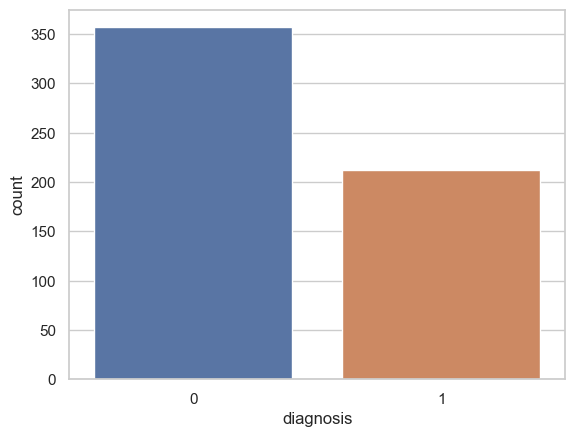

In [1163]:
sns.countplot(df['diagnosis'],label="Count")

In [1164]:
corr = df.corr()

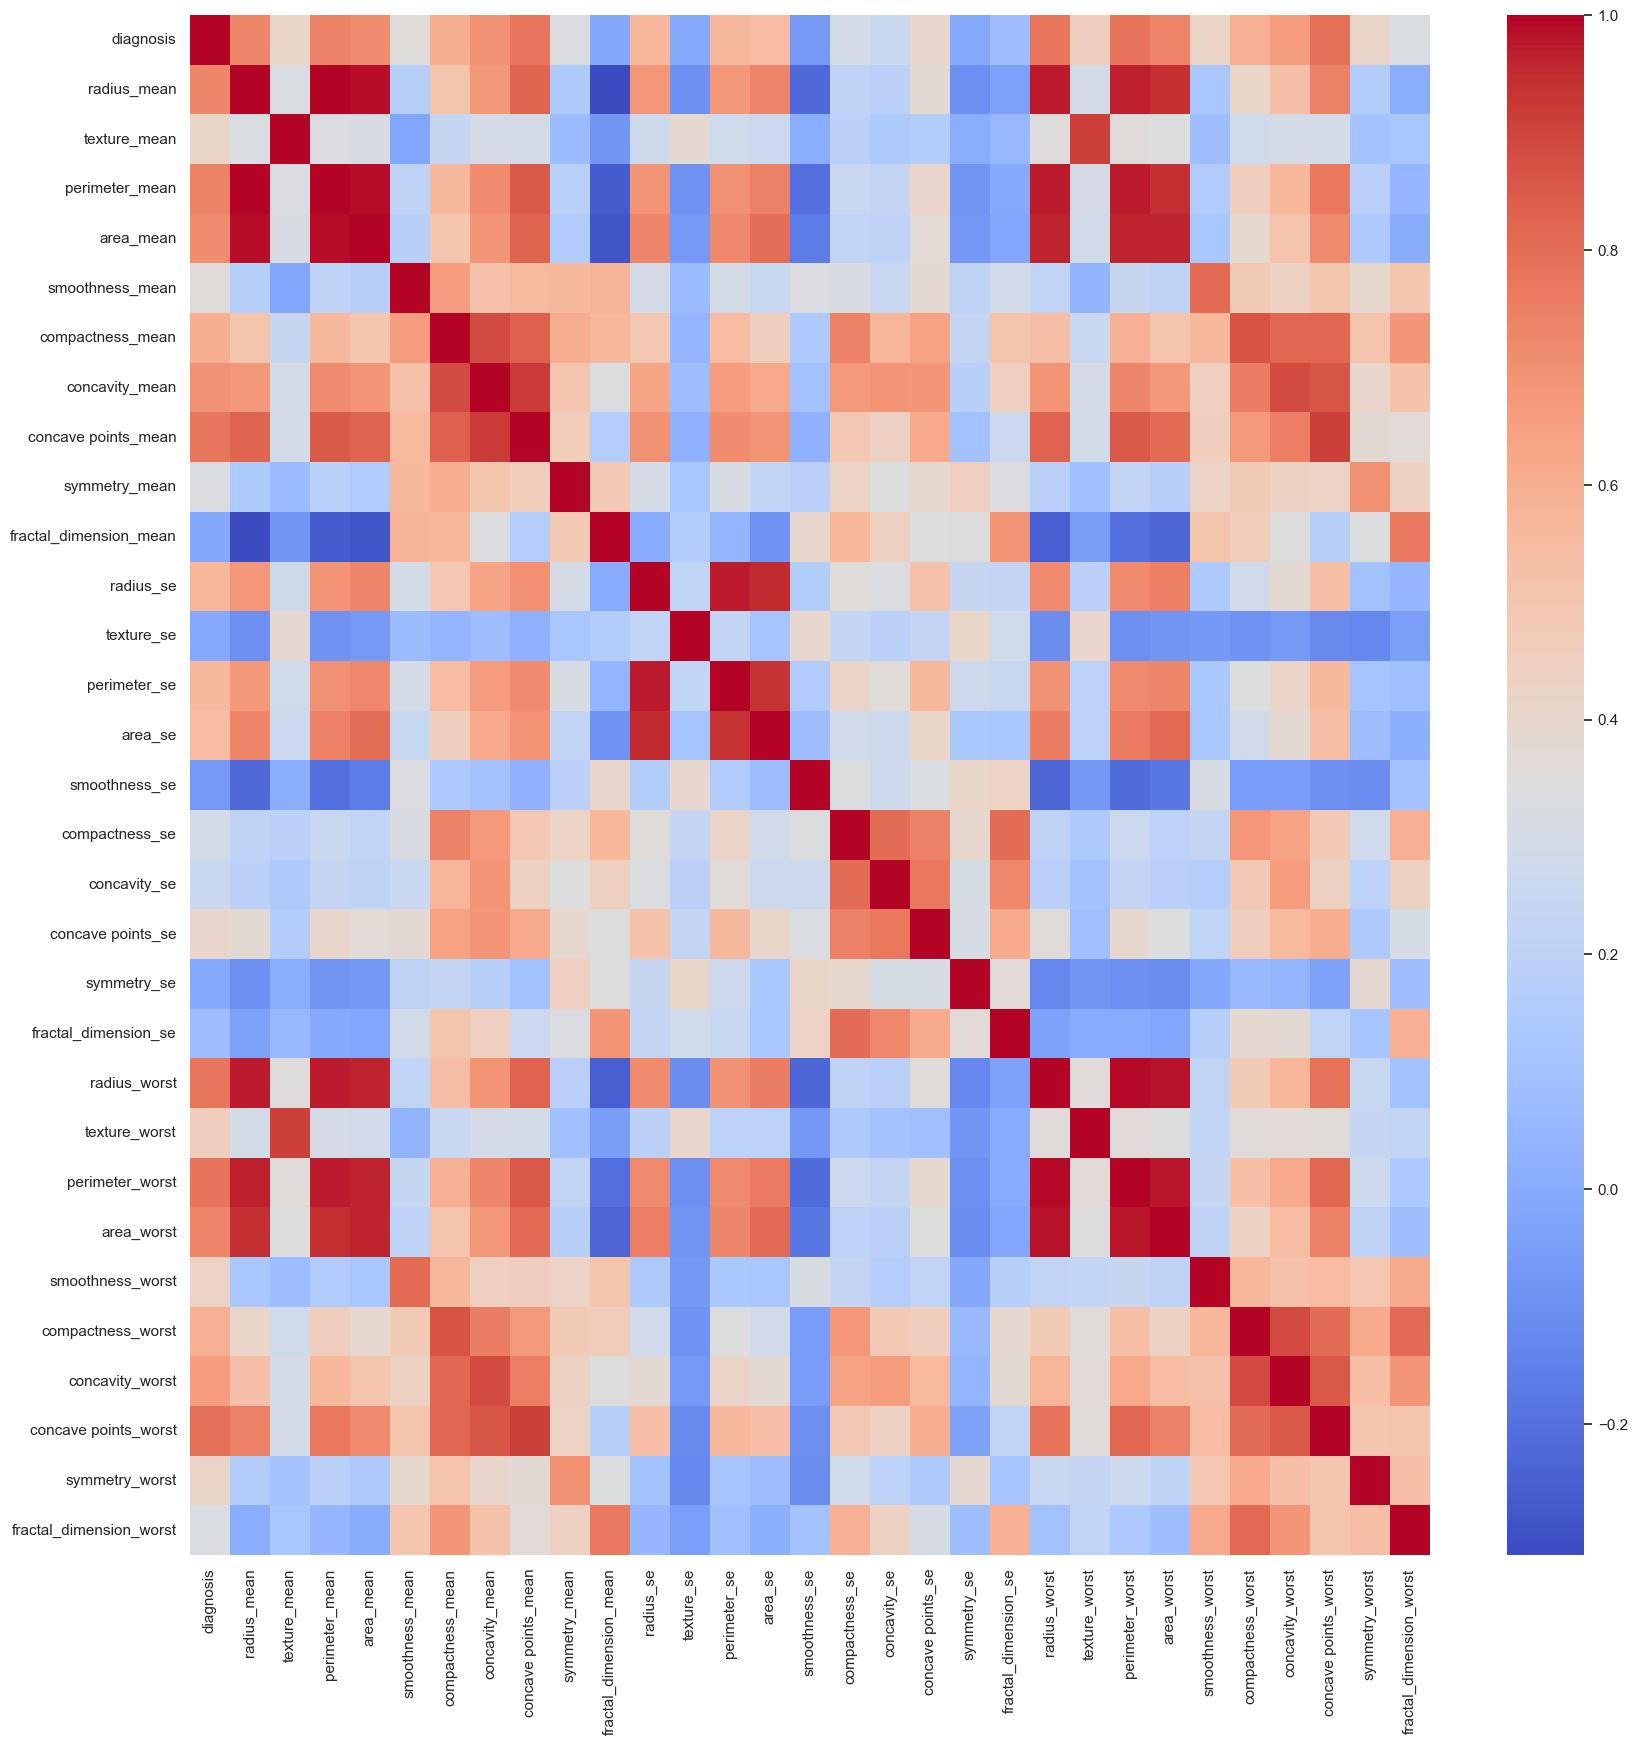

In [1165]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap='coolwarm')
plt.show()

<AxesSubplot:>

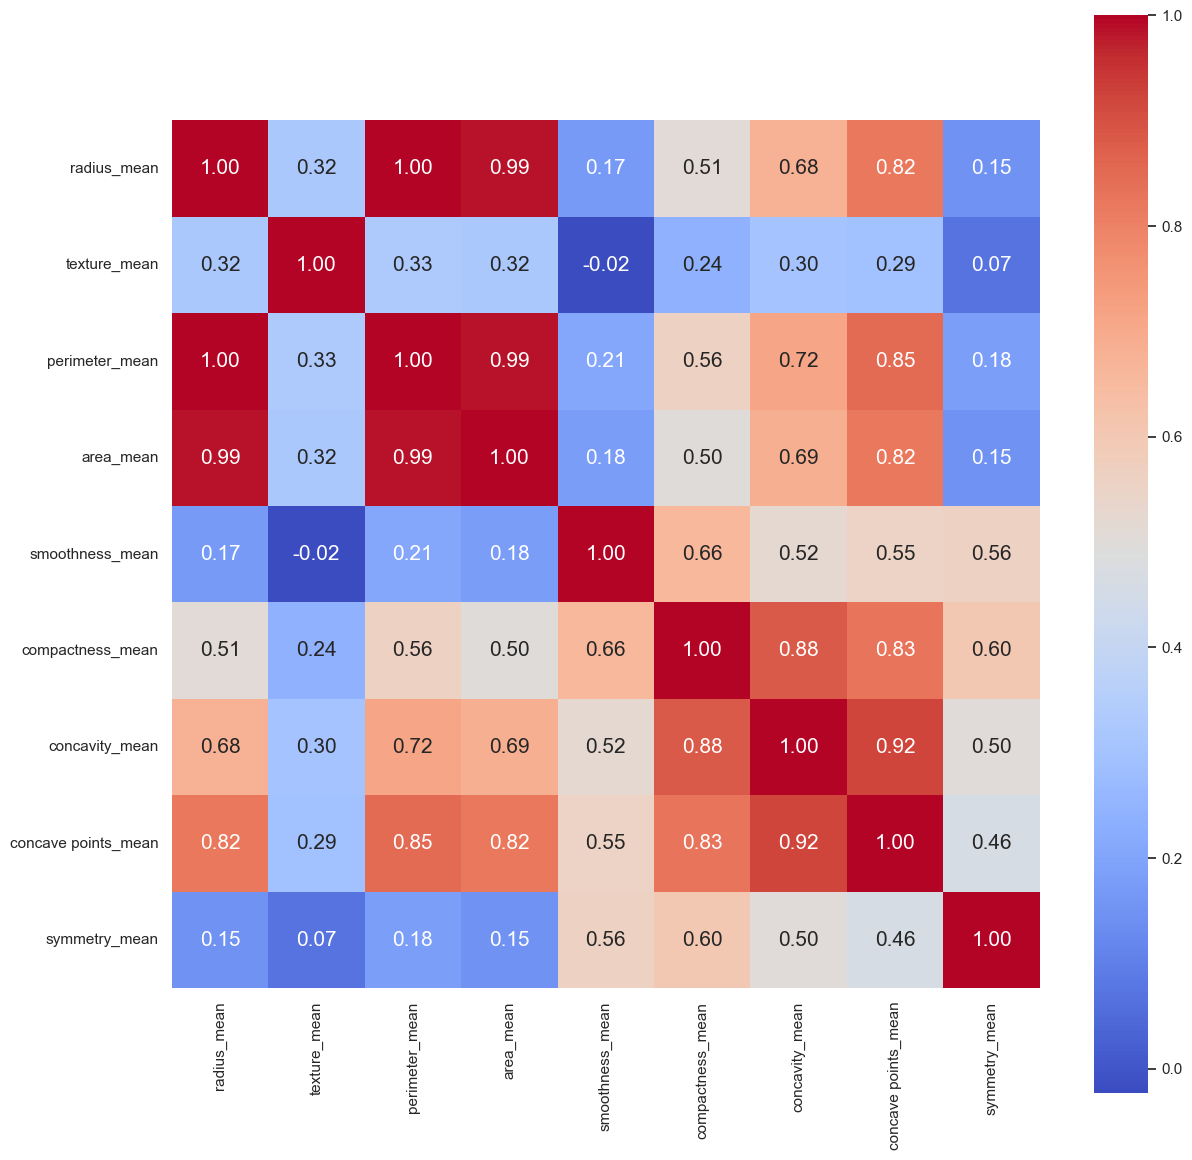

In [1166]:
corr = df[features_mean].corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features_mean, yticklabels= features_mean,
           cmap= 'coolwarm')

<AxesSubplot:>

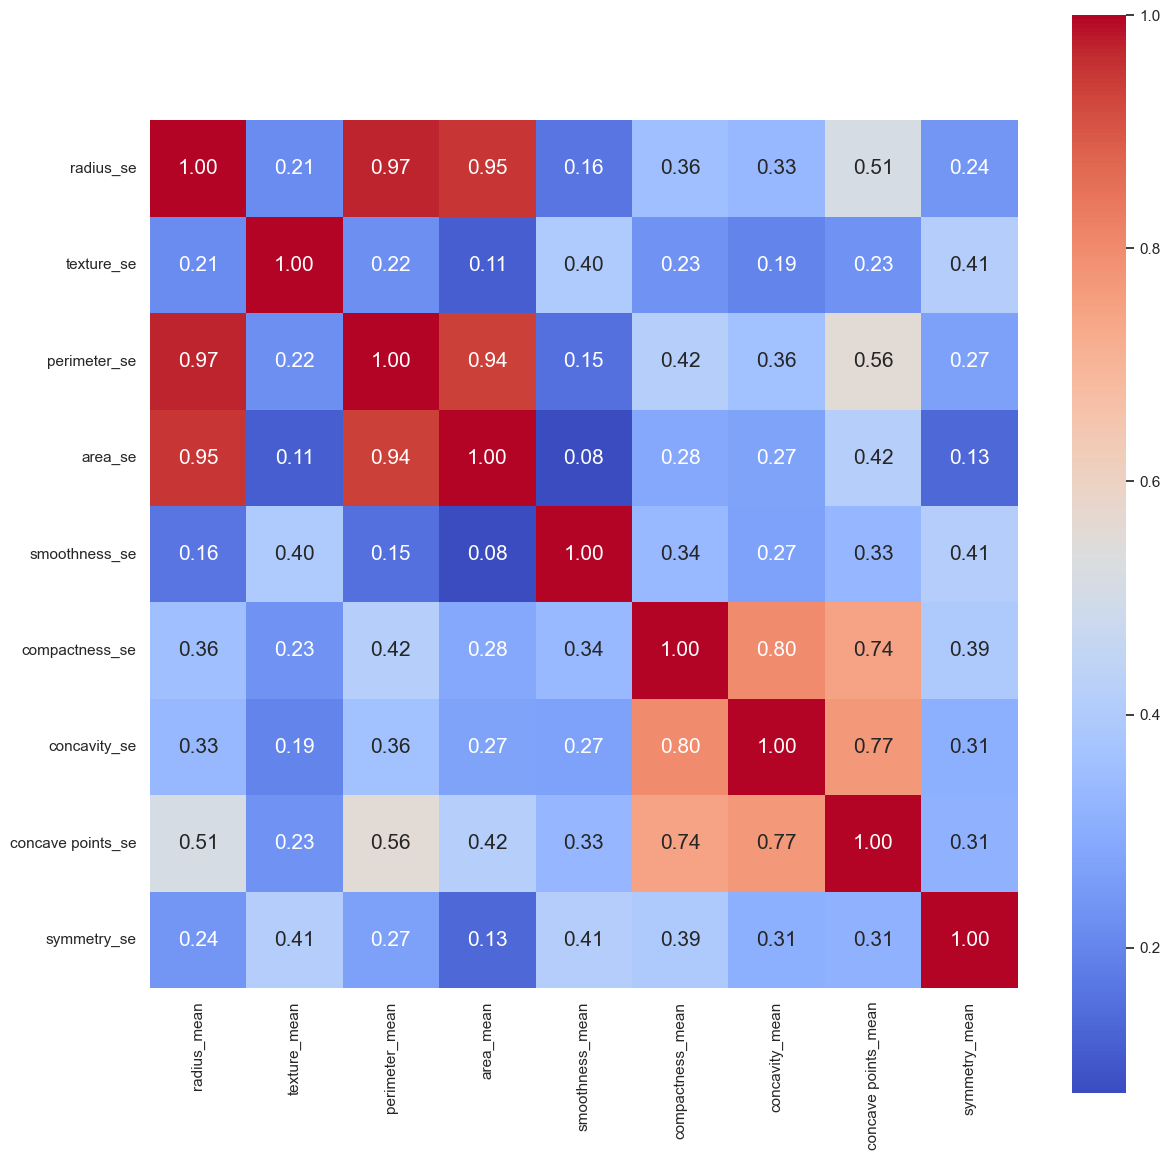

In [1167]:
corr = df[features_se].corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features_mean, yticklabels= features_se,
           cmap= 'coolwarm')

<AxesSubplot:>

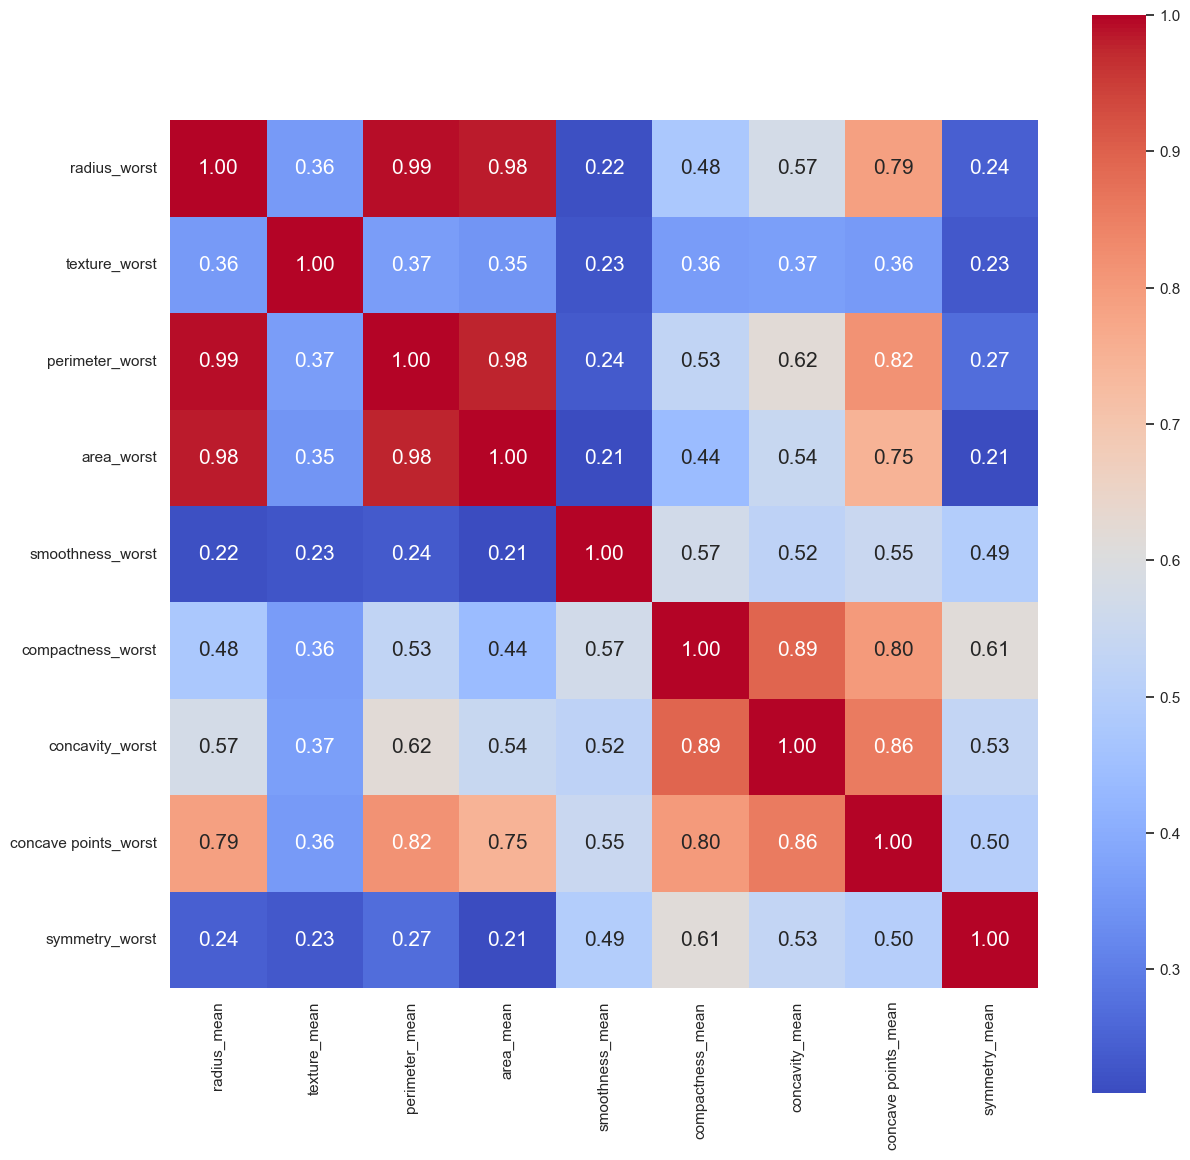

In [1168]:
corr = df[features_worst].corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features_mean, yticklabels= features_worst,
           cmap= 'coolwarm')

In [1169]:
def hist_box_plot(df, columna, altura=15, larg=5):
    fig, axes = plt.subplots(1, 2, figsize=(altura, larg))
    sns.histplot(ax=axes[0], data = df[columna]);
    axes[0].set_title(f'Histograma de {columna}')
    sns.boxplot(ax=axes[1], data = df[columna]);
    axes[1].set_title(f'Boxplot de {columna}')
    plt.show();

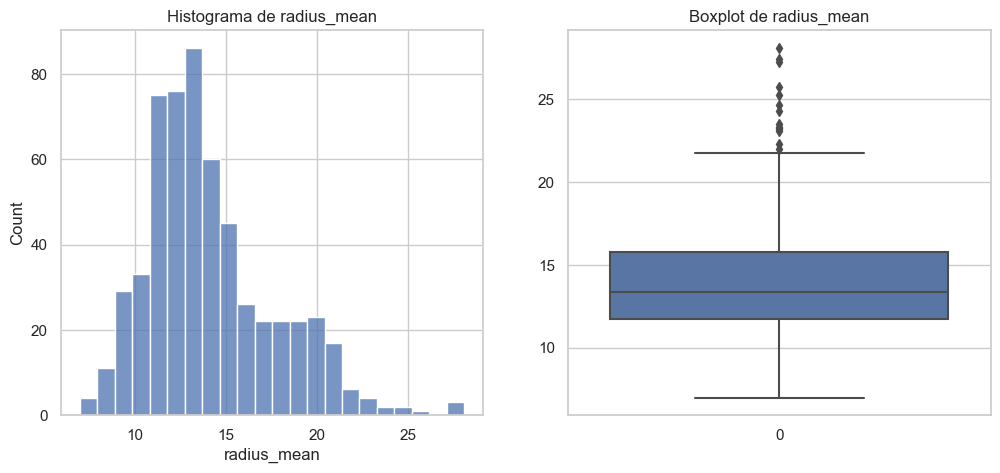

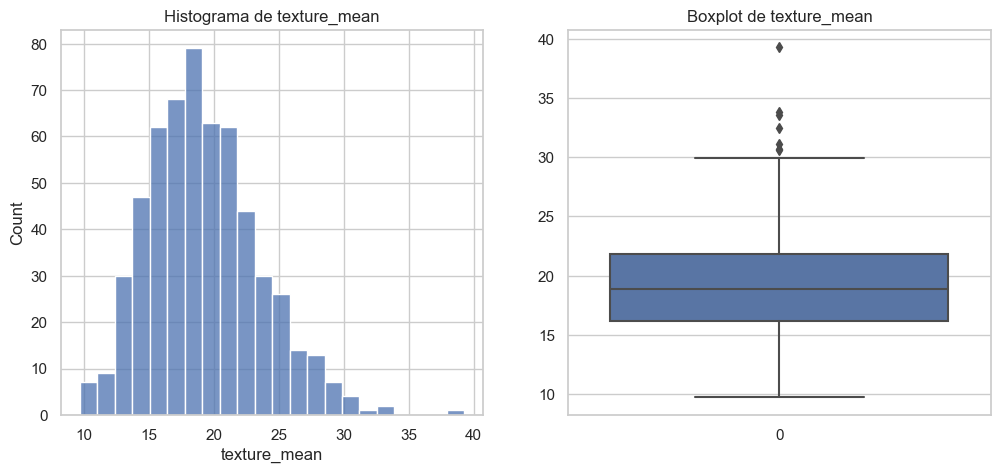

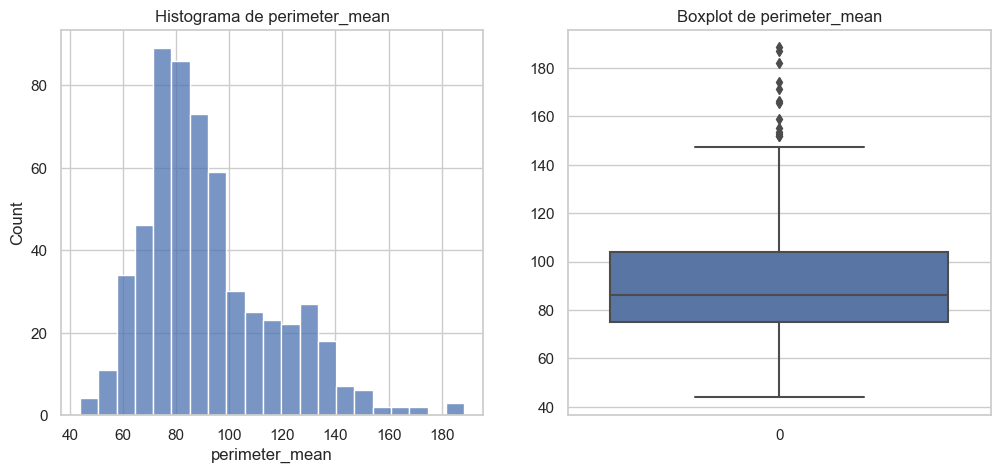

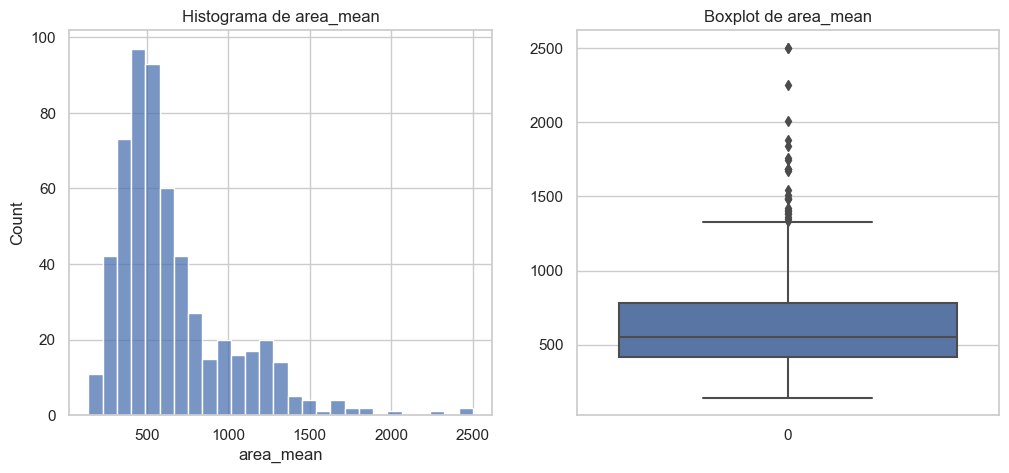

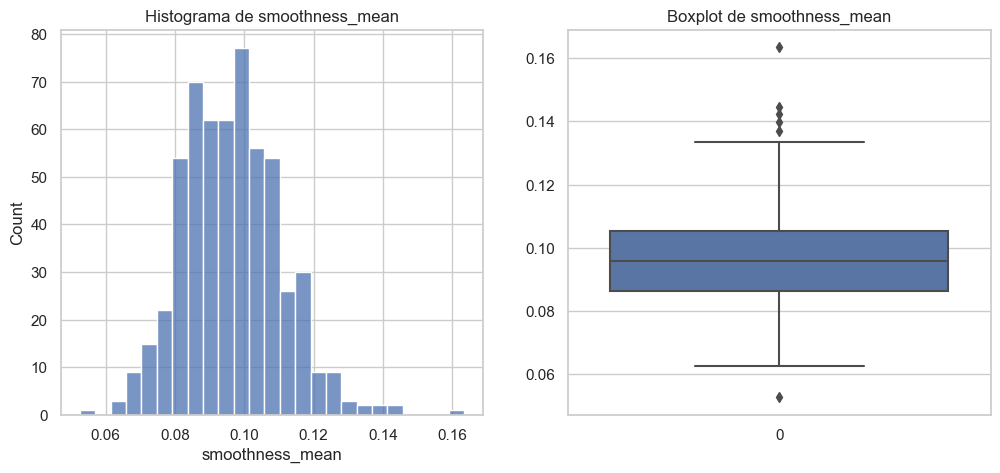

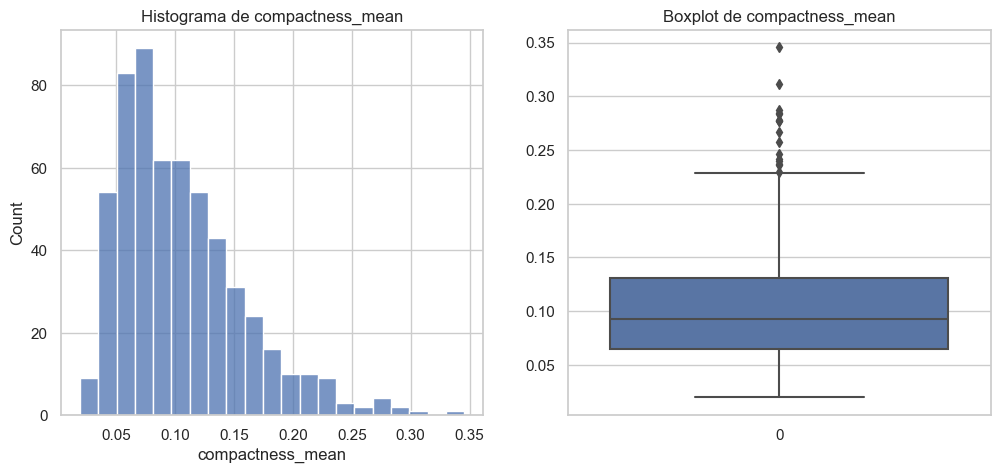

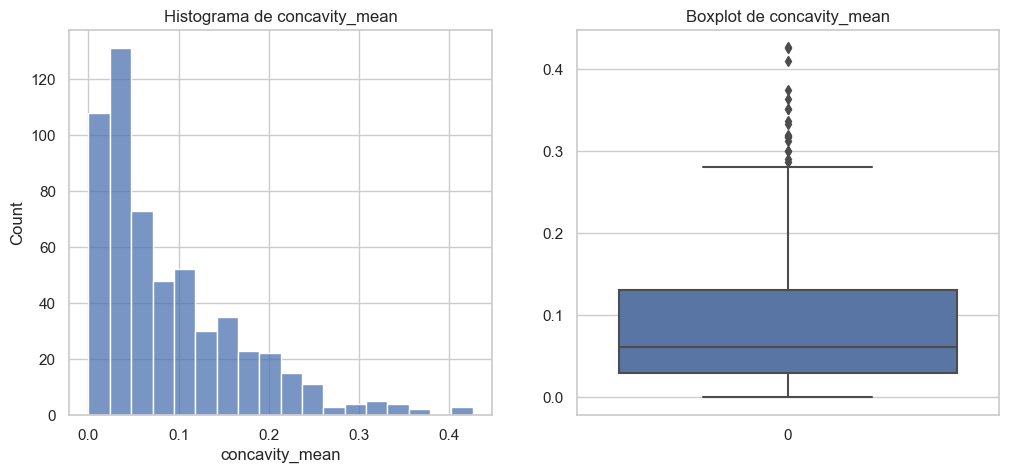

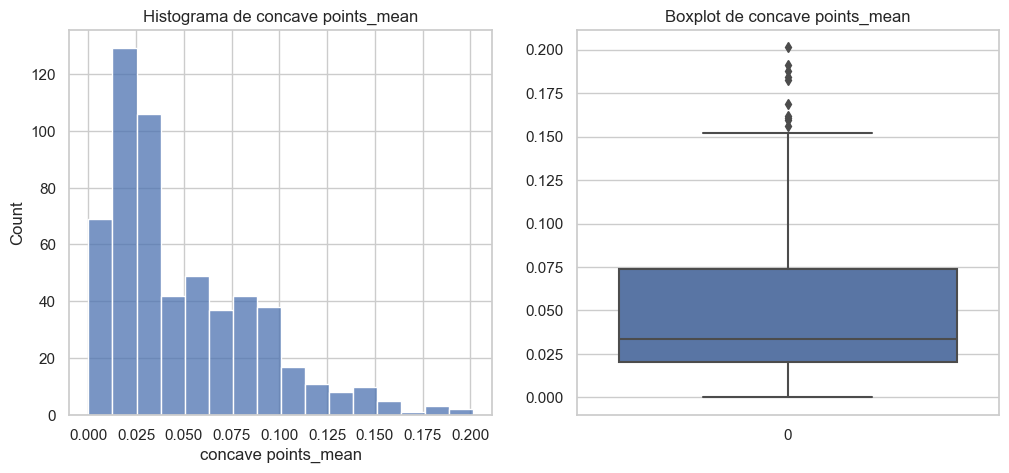

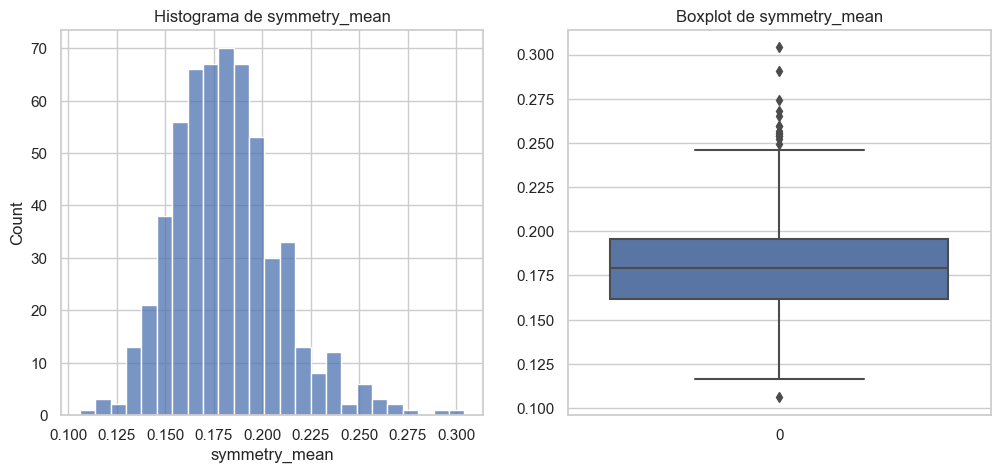

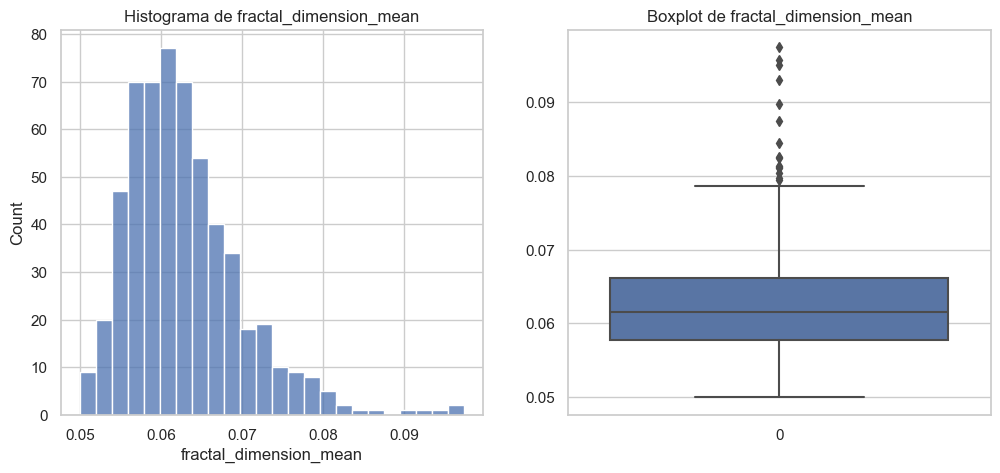

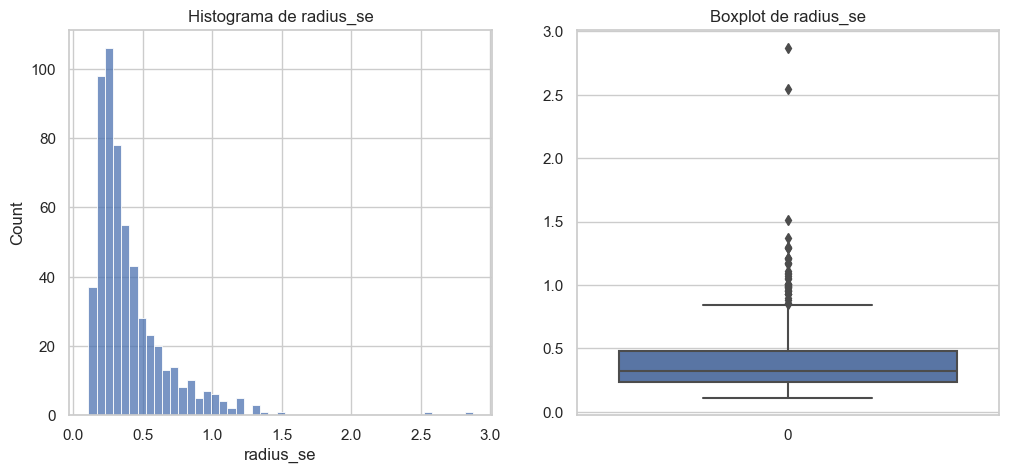

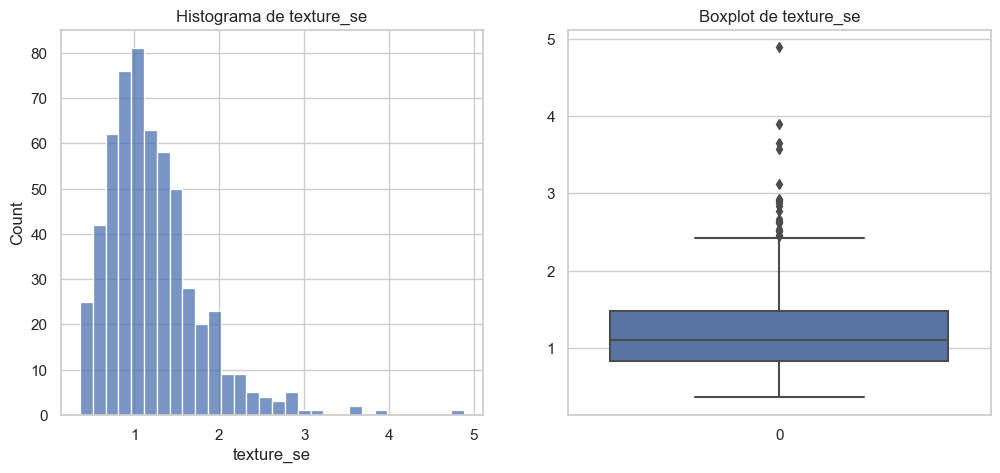

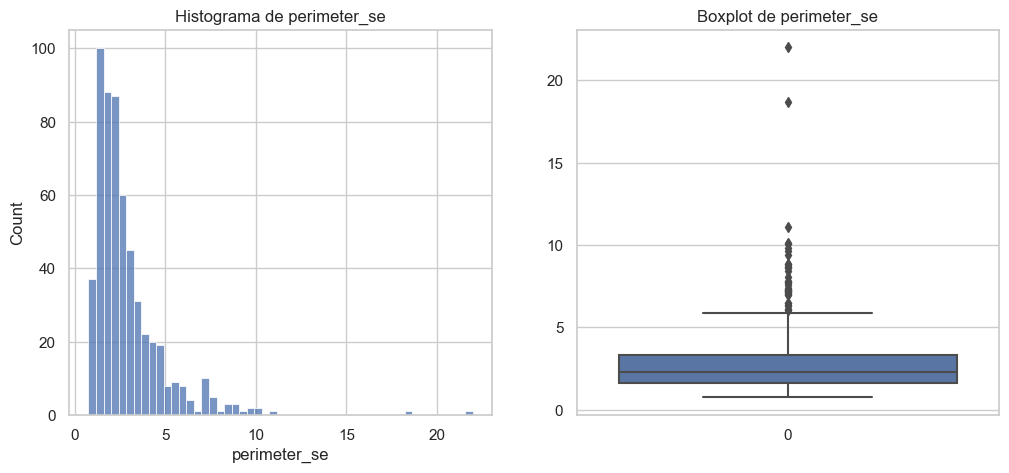

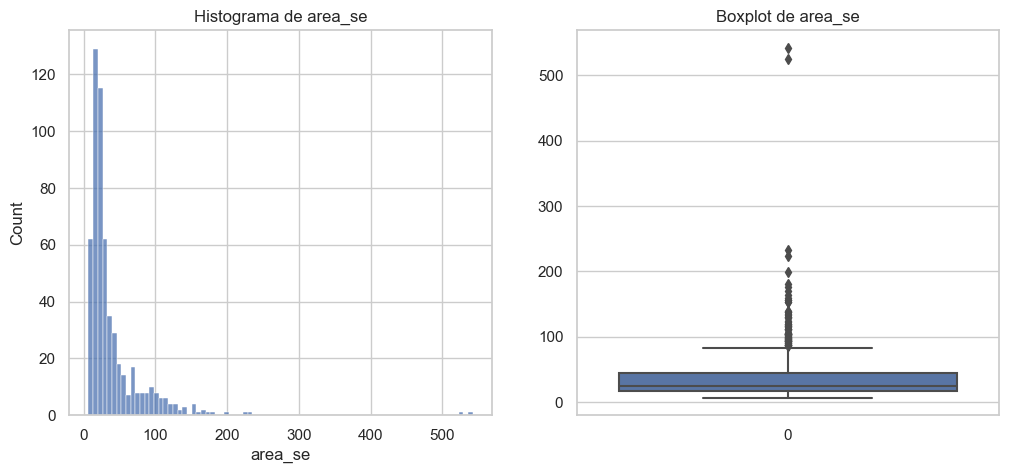

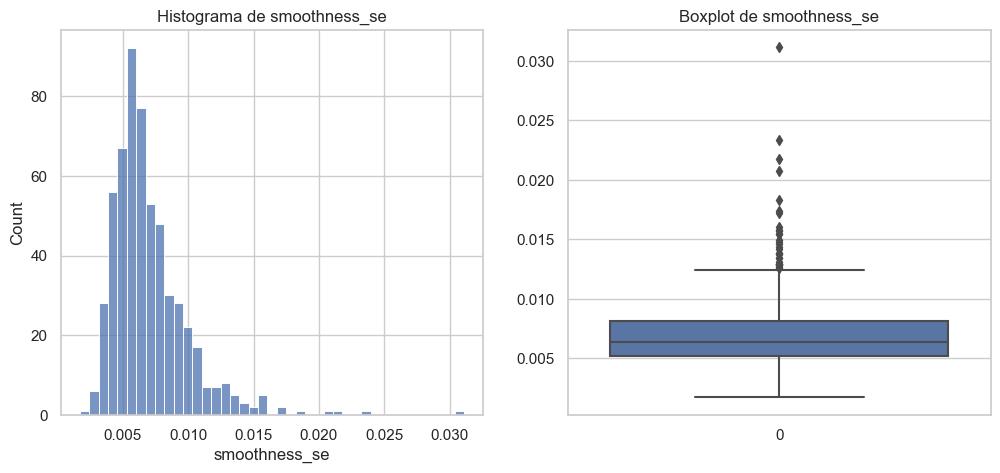

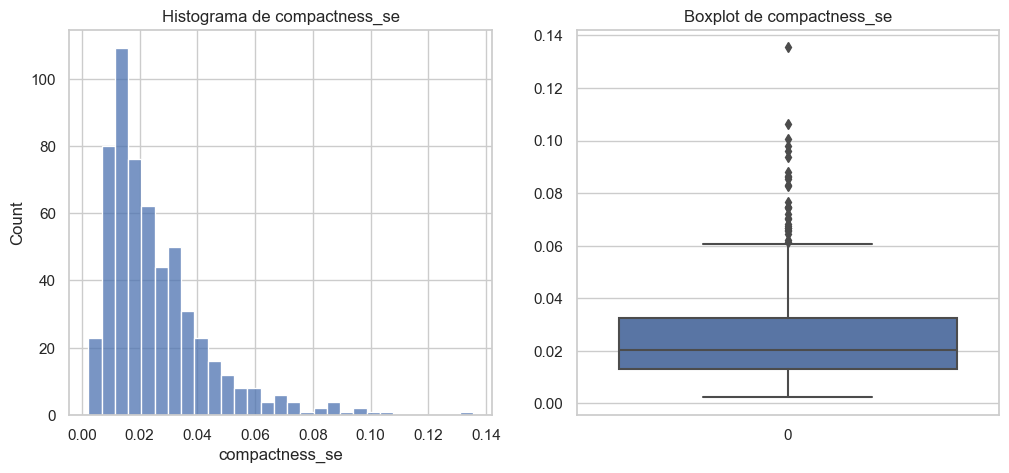

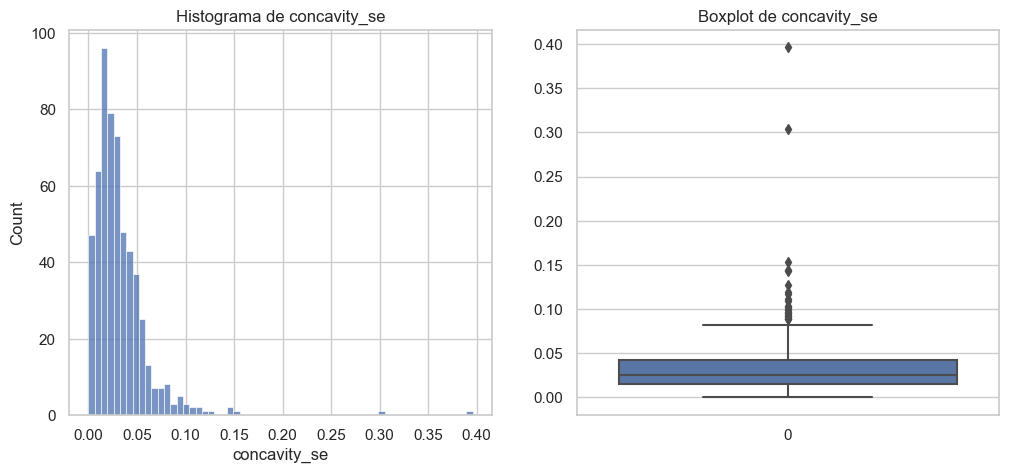

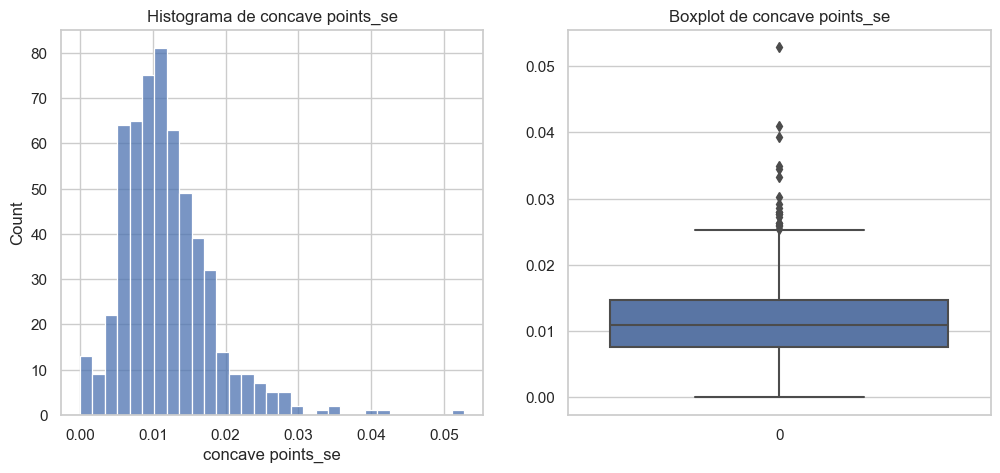

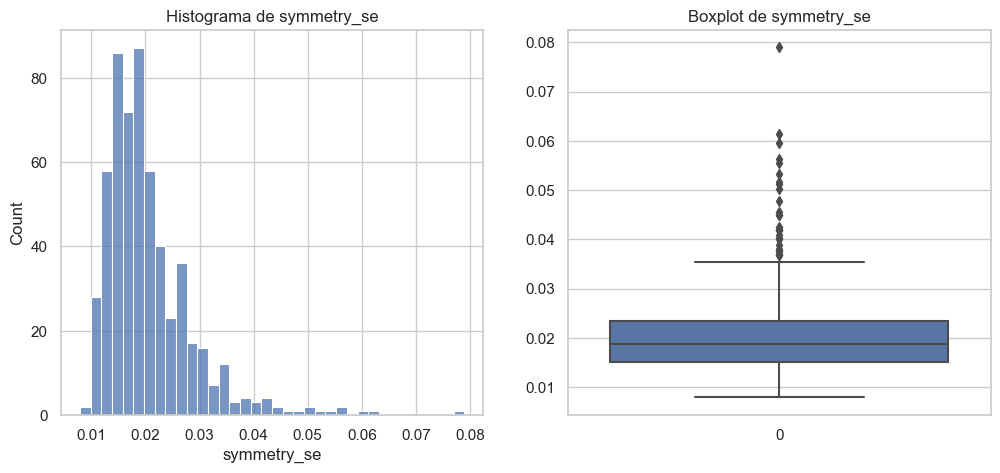

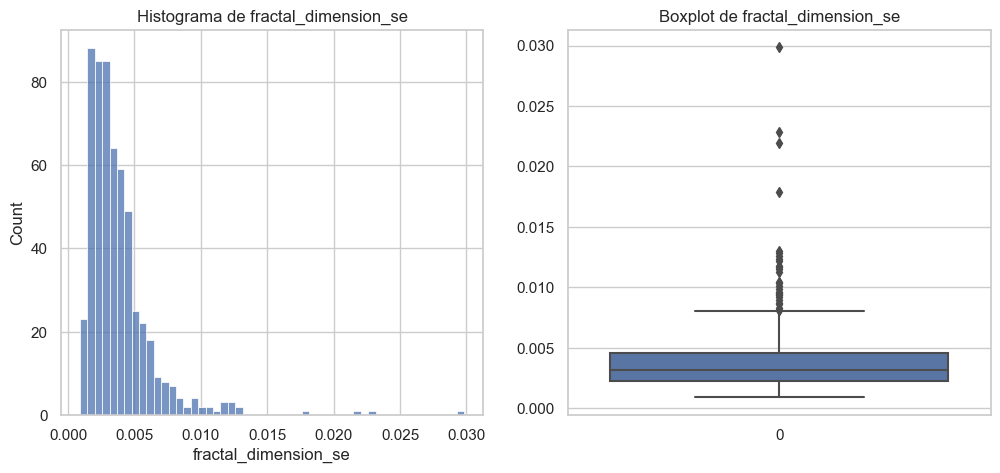

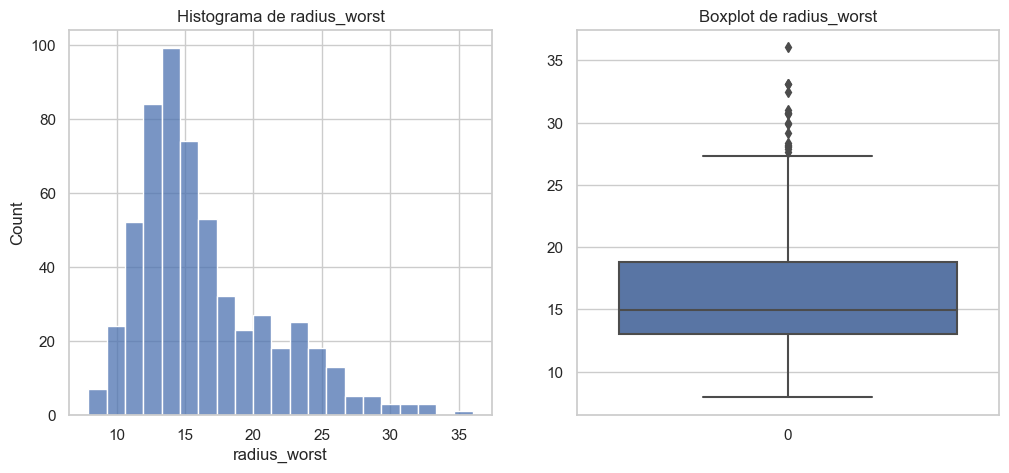

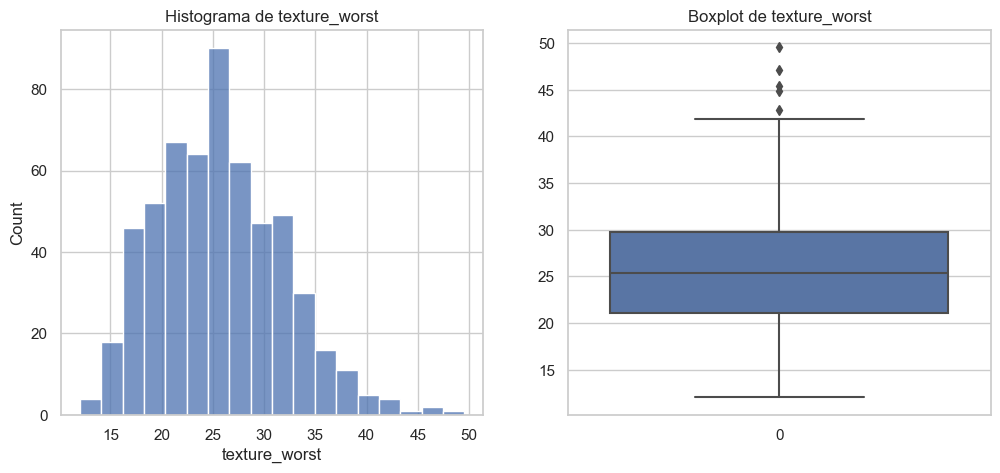

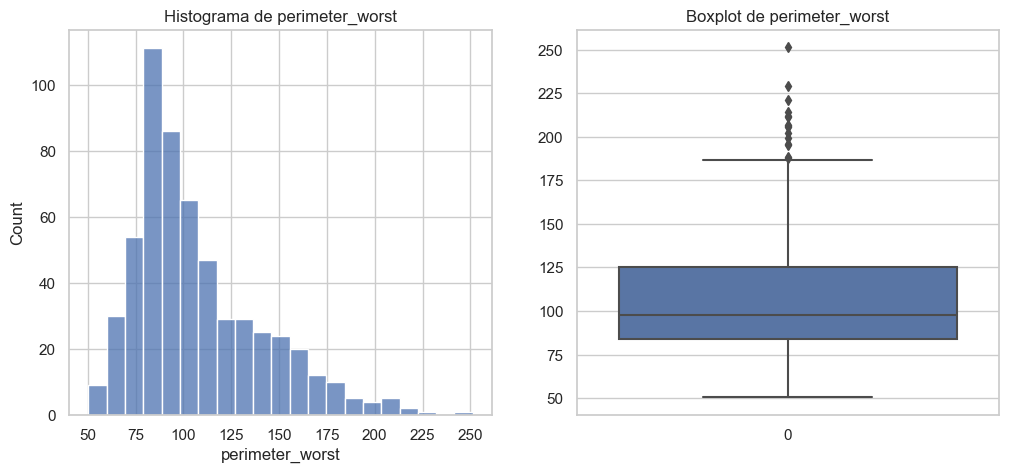

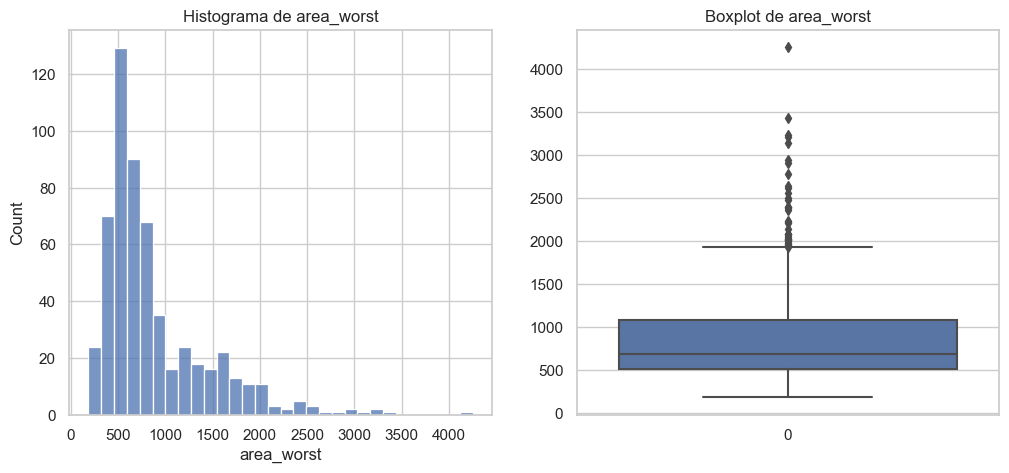

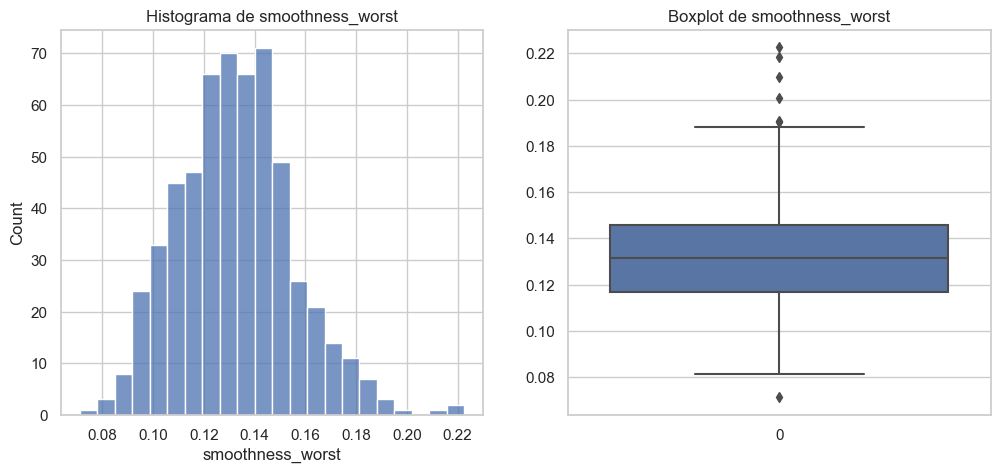

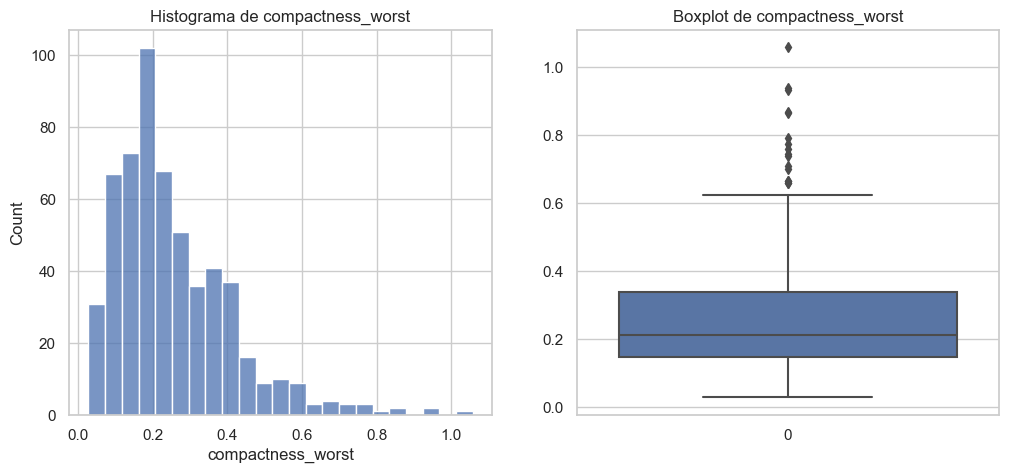

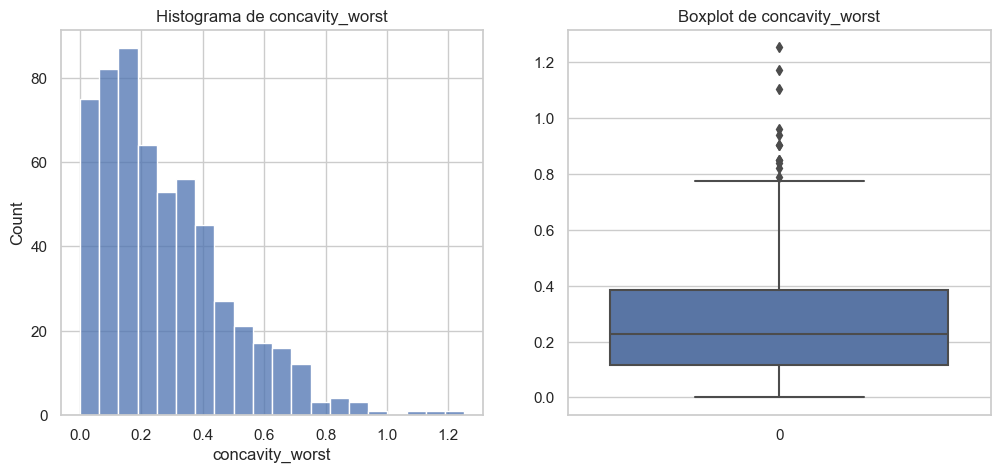

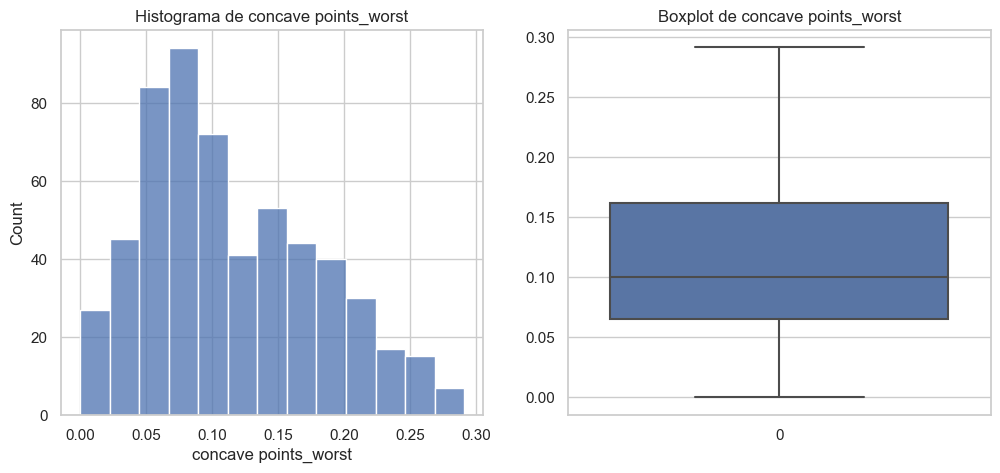

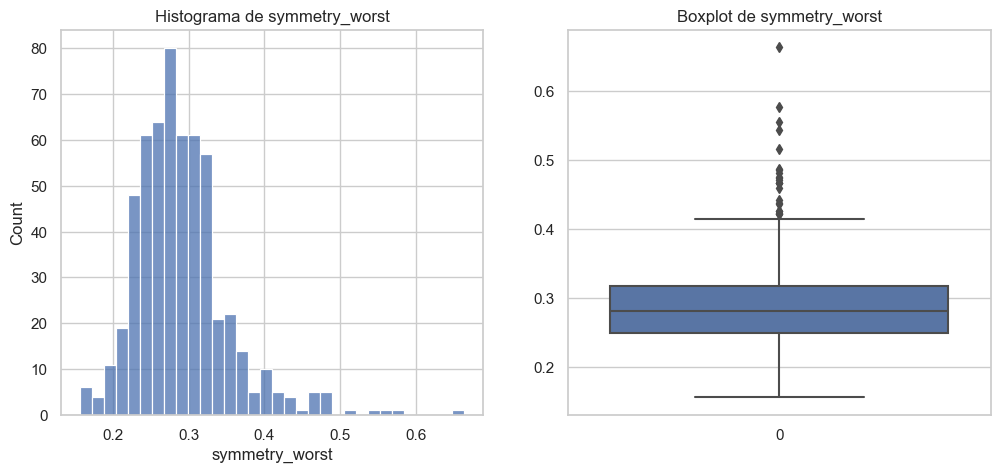

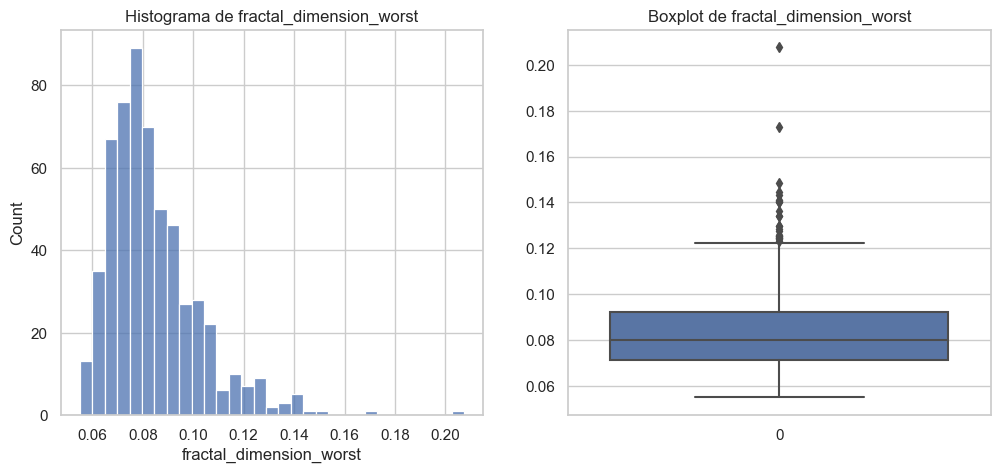

In [1170]:
for col in df.iloc[:, 1:].columns:
    hist_box_plot(df, columna=col, altura=12)

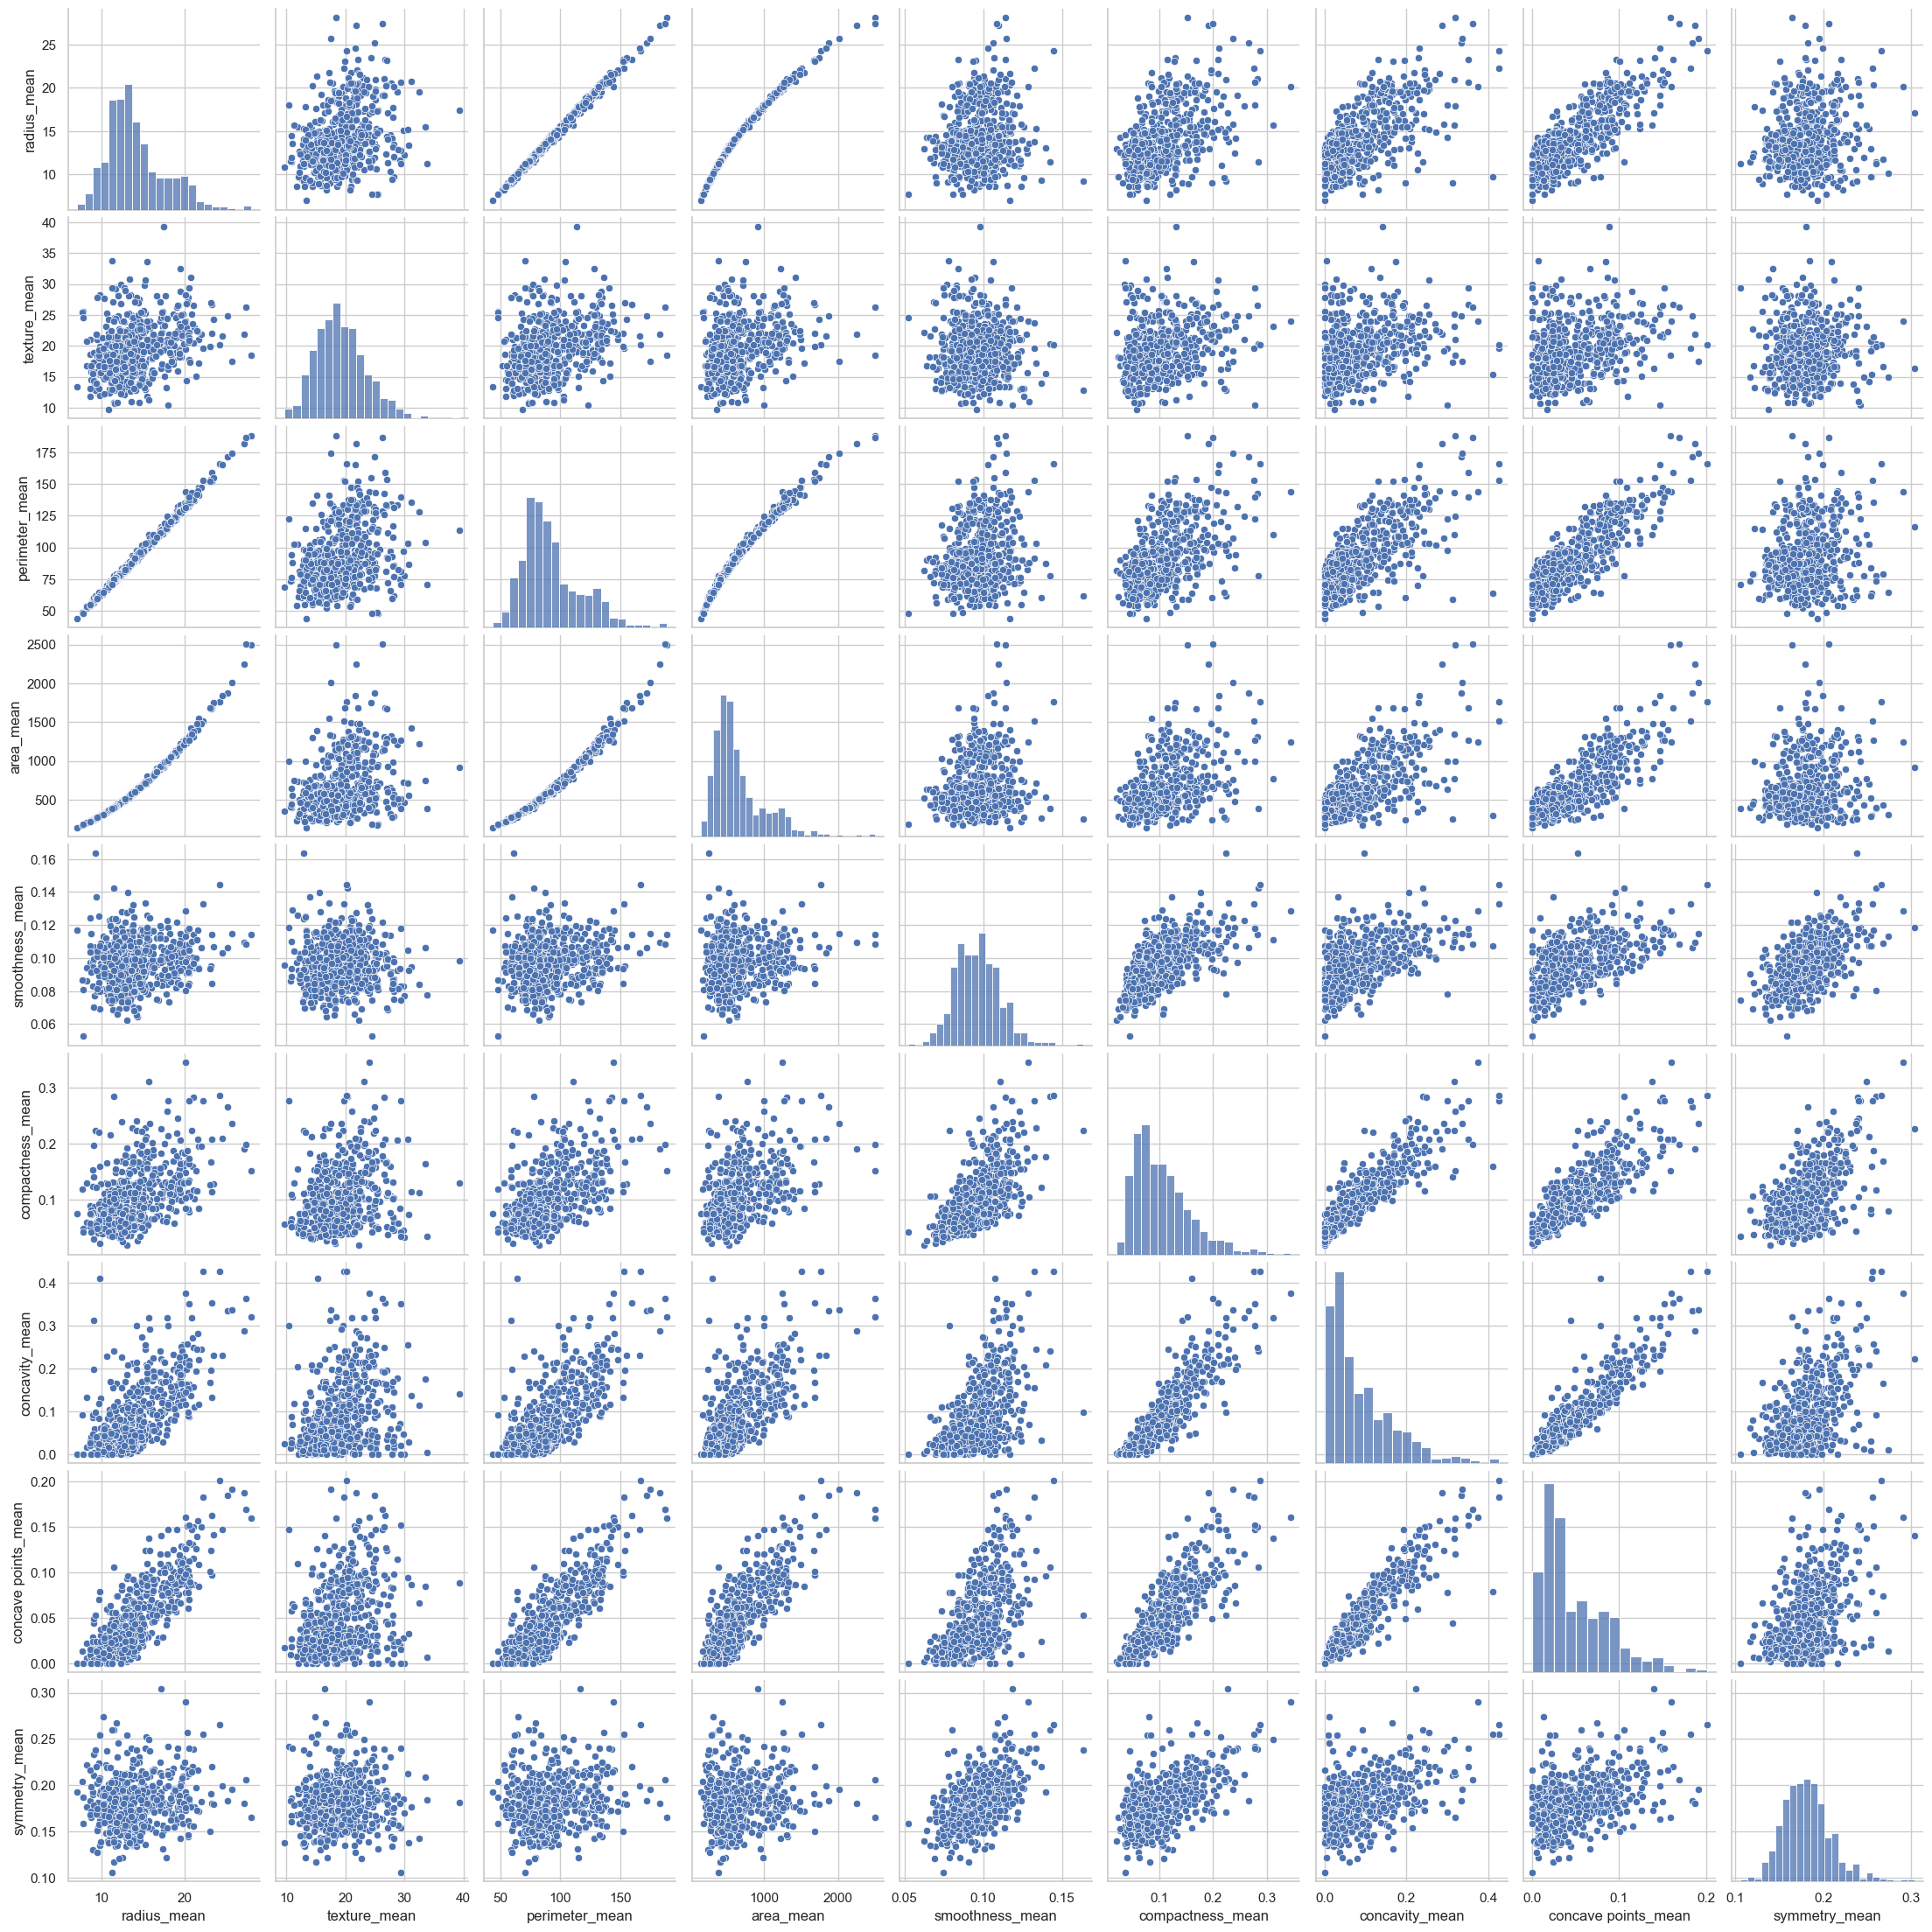

In [1171]:
sns.pairplot(df, vars= df[features_mean]);

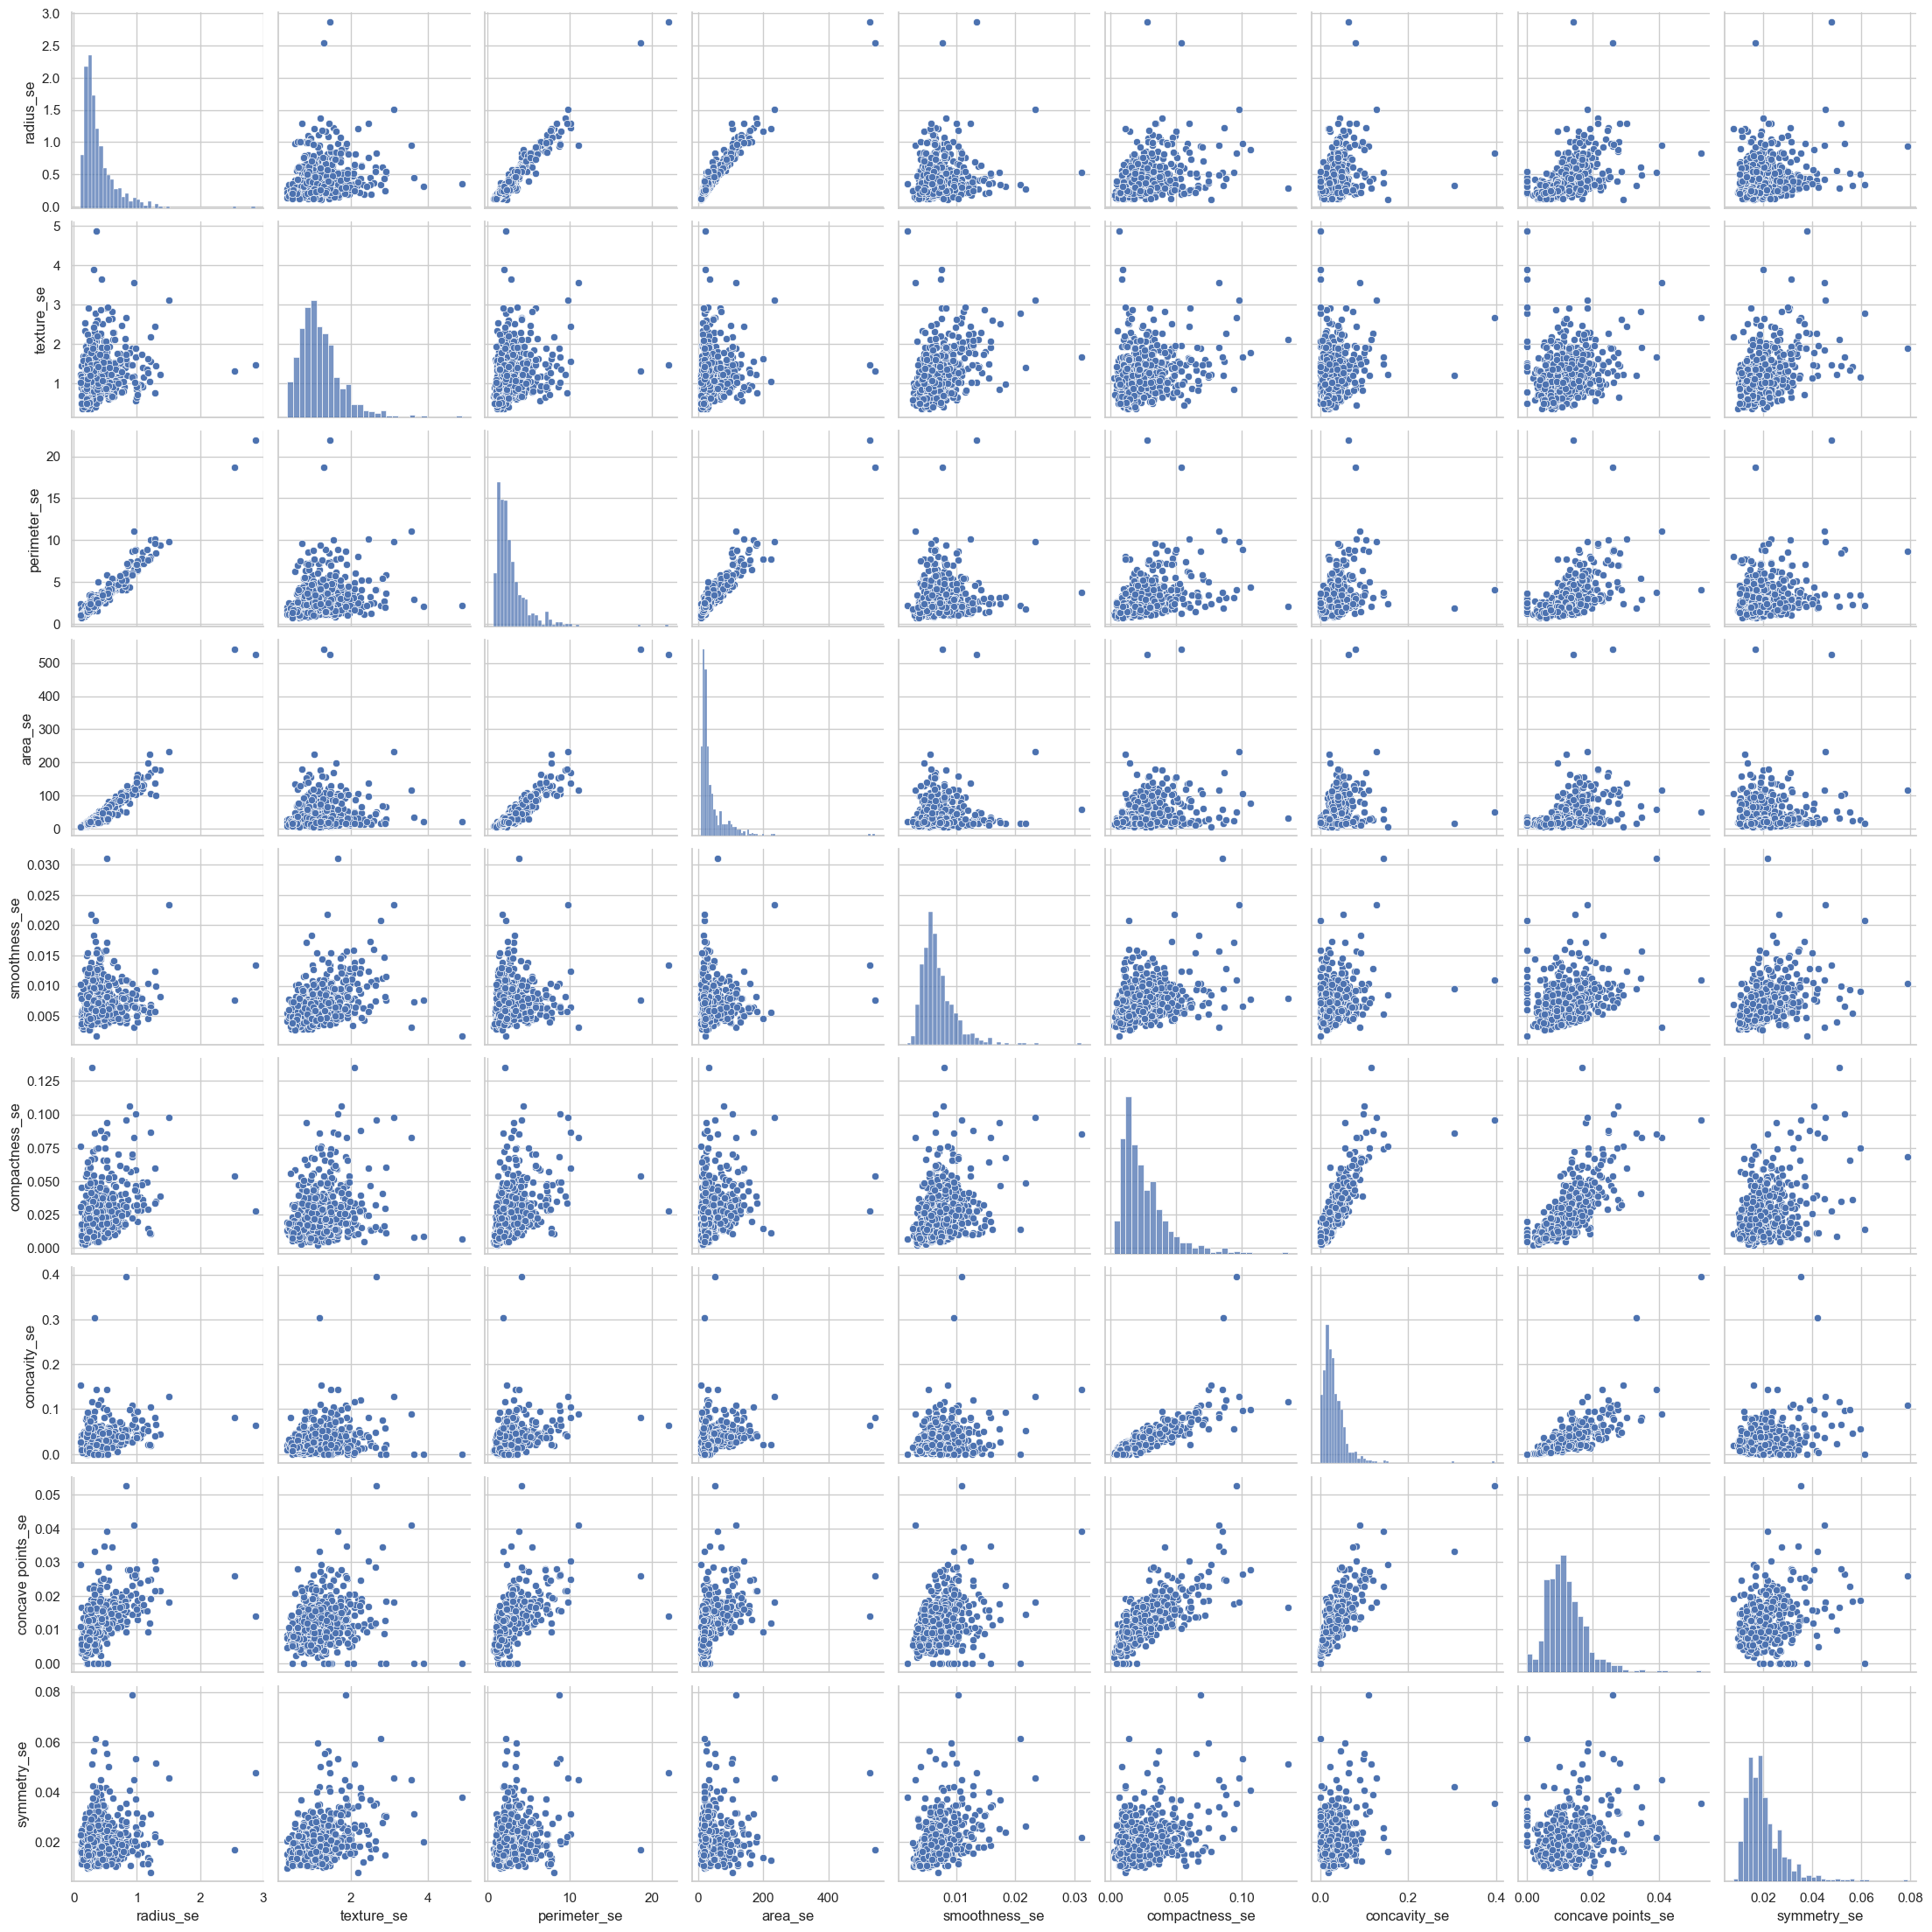

In [1172]:
sns.pairplot(df, vars= df[features_se]);

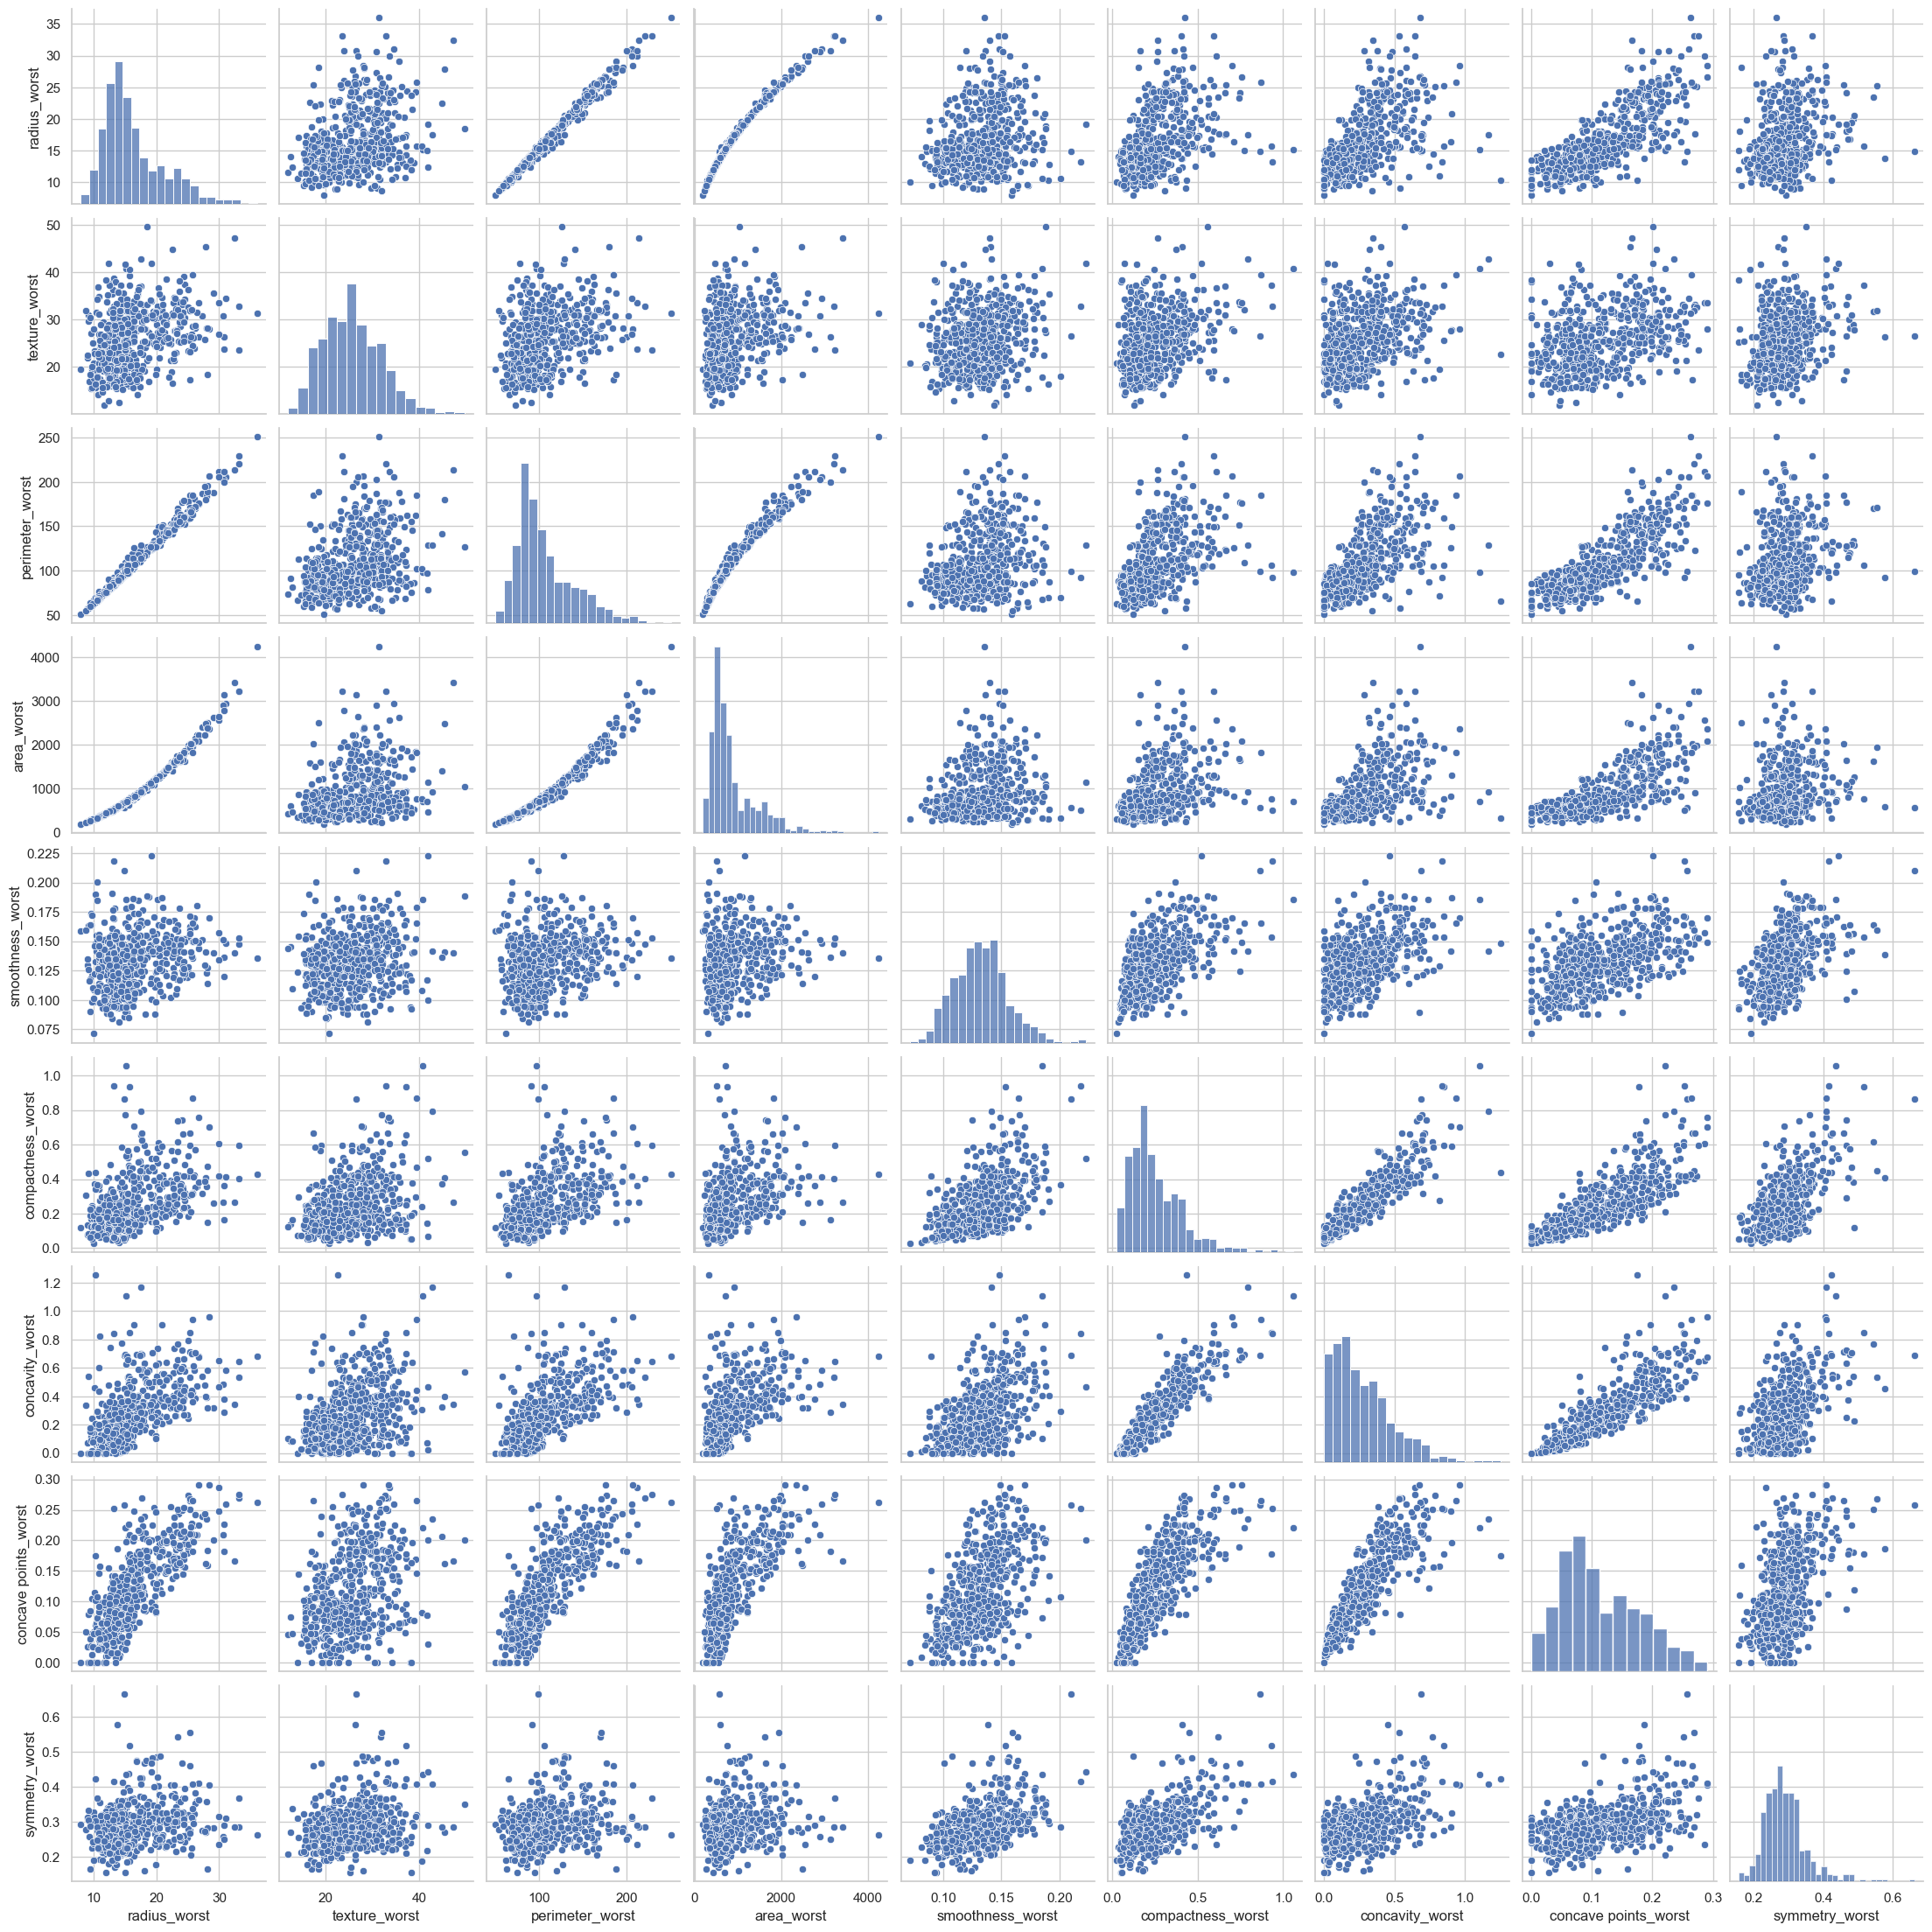

In [1173]:
sns.pairplot(df, vars= df[features_worst]);

In [1174]:
# variable independentes (predictoras)
X = df.drop('diagnosis', axis=1)

# variable dependiente
y = df['diagnosis']

In [1175]:
def evalua_modelo (model, X, y):
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    
    eval_df = pd.DataFrame([[accuracy, f1, precision, recall, balanced_accuracy]], columns=['accuracy', 'f1_score', 'precision', 'recall', 'balanced_accuracy'])
    mat = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
    
    return eval_df, mat



Modelo LogisticRegression

In [1176]:
lg = LogisticRegression(random_state=123)
results, graf = evalua_modelo(lg, X, y)
print(graf)
results.index = ['LogisticRegression']
results

ValueError: too many values to unpack (expected 2)

Modelo Decision Tree

In [ ]:
decision_tree = DecisionTreeClassifier(criterion='entropy',class_weight='balanced',random_state=123)
decision_tree_results, graf = evalua_modelo(decision_tree, X, y)
print( decision_tree_results)
decision_tree_results.index = ['DecisionTree']
results = results.append(decision_tree_results)
print(graf)
results

   accuracy  f1_score  precision    recall  balanced_accuracy
0   0.95614  0.936709   0.973684  0.902439            0.94437


C:\Users\corral02\AppData\Local\Temp\1\ipykernel_21644\2132667476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(decision_tree_results)


accuracy  f1_score  precision    recall  balanced_accuracy
LogisticRegression  0.964912  0.948718   1.000000  0.902439            0.95122
DecisionTree        0.956140  0.936709   0.973684  0.902439            0.94437

Modelo KNearestNeighbors

In [ ]:
knn = KNeighborsClassifier()
knn, graf = evalua_modelo(knn, X, y)
knn.index =['KNearsNeighbors']
results = results.append(knn)
print(graf)
results

C:\Users\corral02\AppData\Local\Temp\1\ipykernel_21644\299189491.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(knn)


accuracy  f1_score  precision    recall  balanced_accuracy
LogisticRegression  0.964912  0.948718   1.000000  0.902439            0.95122
DecisionTree        0.956140  0.936709   0.973684  0.902439            0.94437
KNearsNeighbors     0.982456  0.975000   1.000000  0.951220            0.97561

Modelo RandomForestClassifer

In [ ]:
rfc = RandomForestClassifier()
rfc_result, graf = evalua_modelo(rfc, X, y)
rfc_result.index = ['RandomForest']
results = results.append(rfc_result)
print(graf)
results

C:\Users\corral02\AppData\Local\Temp\1\ipykernel_21644\754453246.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(rfc_result)


accuracy  f1_score  precision    recall  balanced_accuracy
LogisticRegression  0.964912  0.948718   1.000000  0.902439           0.951220
DecisionTree        0.956140  0.936709   0.973684  0.902439           0.944370
KNearsNeighbors     0.982456  0.975000   1.000000  0.951220           0.975610
RandomForest        0.991228  0.987654   1.000000  0.975610           0.987805

Modelo XGBoost

AxesSubplot(0.125,0.11;0.62x0.77)


C:\Users\corral02\AppData\Local\Temp\1\ipykernel_21644\2673818171.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(xgboost_result)


accuracy  f1_score  precision    recall  balanced_accuracy
LogisticRegression  0.964912  0.948718   1.000000  0.902439           0.951220
DecisionTree        0.956140  0.936709   0.973684  0.902439           0.944370
KNearsNeighbors     0.982456  0.975000   1.000000  0.951220           0.975610
RandomForest        0.991228  0.987654   1.000000  0.975610           0.987805
XGBoost             0.964912  0.950000   0.974359  0.926829           0.956565

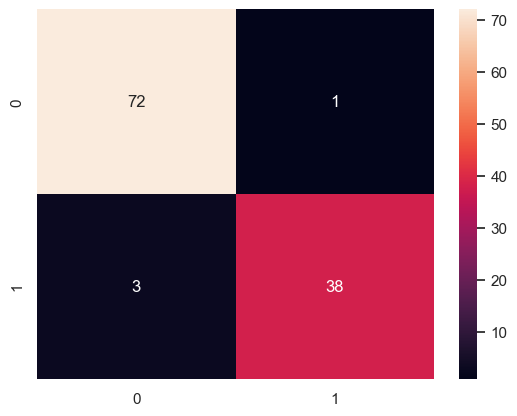

In [ ]:
xgboost = xgb.XGBClassifier()
xgboost_result, graf = evalua_modelo(xgboost, X, y)
xgboost_result.index = ['XGBoost']
results = results.append(xgboost_result)
print(graf)
results

C:\Users\corral02\AppData\Local\Temp\1\ipykernel_21644\2021839765.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(LogisticRegression_all_features)
C:\Users\corral02\AppData\Local\Temp\1\ipykernel_21644\2021839765.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(DecisionTree_all_features)
C:\Users\corral02\AppData\Local\Temp\1\ipykernel_21644\2021839765.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(RandomForest_all_features)
C:\Users\corral02\AppData\Local\Temp\1\ipykernel_21644\2021839765.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results 

accuracy  f1_score  precision    recall  \
LogisticRegression               0.964912  0.948718   1.000000  0.902439   
DecisionTree                     0.956140  0.936709   0.973684  0.902439   
KNearsNeighbors                  0.982456  0.975000   1.000000  0.951220   
RandomForest                     0.991228  0.987654   1.000000  0.975610   
XGBoost                          0.964912  0.950000   0.974359  0.926829   
LogisticRegression_all_features  0.964912  0.948718   1.000000  0.902439   
DecisionTree_all_features        0.956140  0.936709   0.973684  0.902439   
RandomForest_all_features        0.991228  0.987654   1.000000  0.975610   
XGBoost_all_features             0.964912  0.950000   0.974359  0.926829   

                                 balanced_accuracy  
LogisticRegression                        0.951220  
DecisionTree                              0.944370  
KNearsNeighbors                           0.975610  
RandomForest                              0.987805  
XGBoost                                   0.956565  
LogisticRegression_all_features           0.951220  
DecisionTree_all_features                 0.944370  
RandomForest_all_features                 0.987805  
XGBoost_all_features                      0.956565

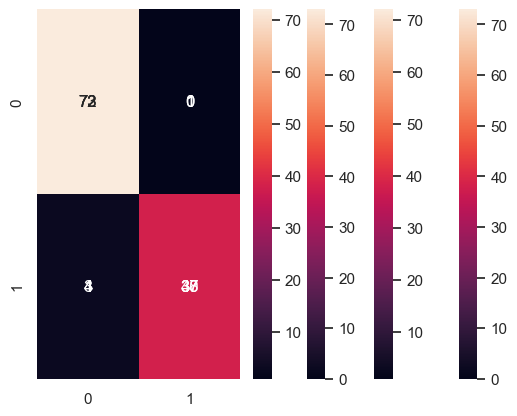

In [ ]:
LogisticRegression_all_features, a = evalua_modelo(lg, X, y)

LogisticRegression_all_features.index = ['LogisticRegression_all_features']
results = results.append(LogisticRegression_all_features)

DecisionTree_all_features, a  = evalua_modelo(decision_tree, X, y)

DecisionTree_all_features.index = ['DecisionTree_all_features']
results = results.append(DecisionTree_all_features)


#KNearsNeighbors_all_features, a =  evalua_modelo(knn, X, y)

#KNearsNeighbors_all_features.index = ['KNearsNeighbors_all_features']
#results = results.append(KNearsNeighbors_all_features)

RandomForest_all_features, a = evalua_modelo(rfc, X, y)

RandomForest_all_features.index = ['RandomForest_all_features']
results = results.append(RandomForest_all_features)


XGBoost_all_features, a = evalua_modelo(xgboost, X, y)

XGBoost_all_features.index = ['XGBoost_all_features']
results = results.append(XGBoost_all_features)

results

In [ ]:
print(results.iloc[:5,0])
print(results.iloc[:5,1])
print(results.iloc[:5,2])
print(results.iloc[:5,3])
print(results.iloc[:5,4])

LogisticRegression    0.964912
DecisionTree          0.956140
KNearsNeighbors       0.982456
RandomForest          0.991228
XGBoost               0.964912
Name: accuracy, dtype: float64
LogisticRegression    0.948718
DecisionTree          0.936709
KNearsNeighbors       0.975000
RandomForest          0.987654
XGBoost               0.950000
Name: f1_score, dtype: float64
LogisticRegression    1.000000
DecisionTree          0.973684
KNearsNeighbors       1.000000
RandomForest          1.000000
XGBoost               0.974359
Name: precision, dtype: float64
LogisticRegression    0.902439
DecisionTree          0.902439
KNearsNeighbors       0.951220
RandomForest          0.975610
XGBoost               0.926829
Name: recall, dtype: float64
LogisticRegression    0.951220
DecisionTree          0.944370
KNearsNeighbors       0.975610
RandomForest          0.987805
XGBoost               0.956565
Name: balanced_accuracy, dtype: float64


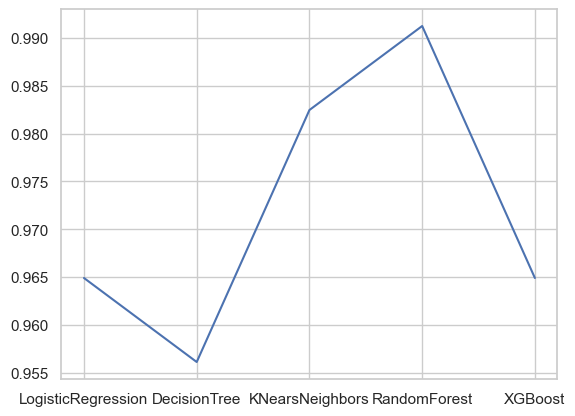

In [ ]:
print(plt.plot(results.iloc[:5,0],label='accuracy'))

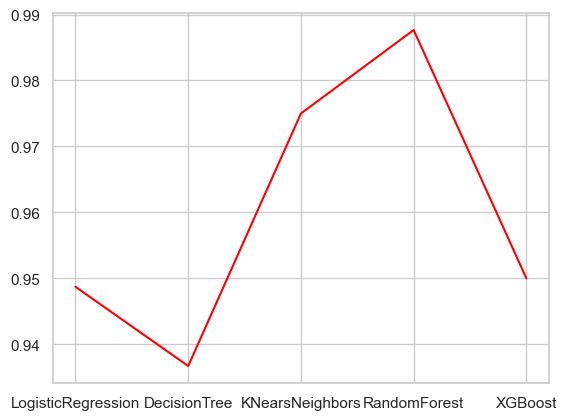

In [ ]:
print(plt.plot(results.iloc[:5,1],label='F1',color='red'))

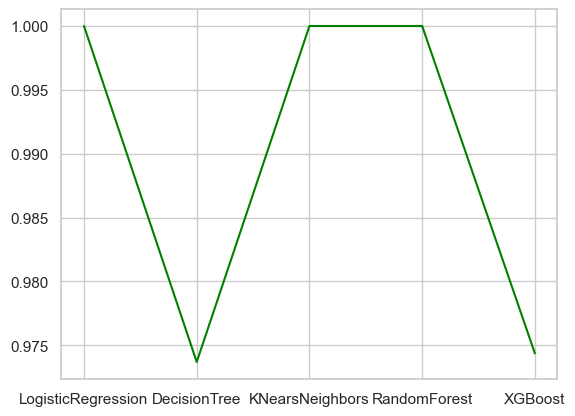

In [ ]:
print(plt.plot(results.iloc[:5,2],label='Precision',color='green'))


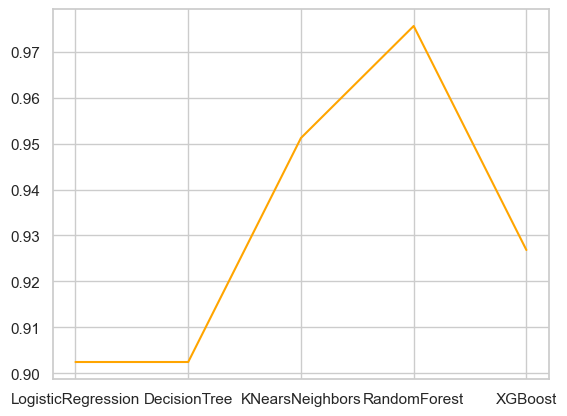

In [ ]:
print(plt.plot(results.iloc[:5,3],label='recall',color='orange'))


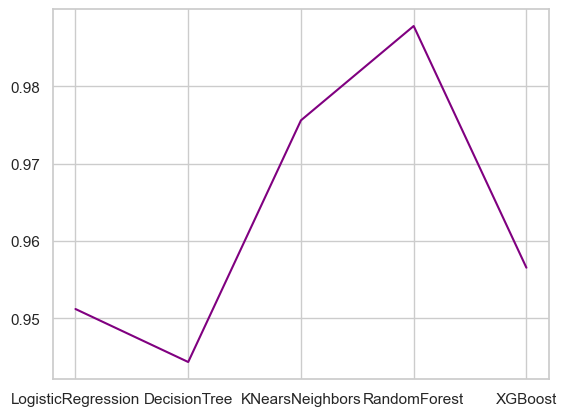

In [ ]:
print(plt.plot(results.iloc[:5,4],label='balanced_accuracy',color='purple'))